<a href="https://colab.research.google.com/github/samarranjit/Yield_Prediction/blob/main/Deep_Learning_Techniques/CNN_LSTM_based_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import RobustScaler

In [2]:
soy_fn = r"/content/drive/MyDrive/Colab Notebooks/Data For Yield Prediction/Data/df_soybeans_absolute_all_years_with_divided_precipitation.parquet"
corn_fn = r"/content/drive/MyDrive/Colab Notebooks/Data For Yield Prediction/Data/df_corn_absolute_all_years_with_divided_precipitation.parquet"
wheat_fn = r"/content/drive/MyDrive/Colab Notebooks/Data For Yield Prediction/Data/df_wheat_absolute_all_years_with_divided_precipitation2.parquet"
# soy_fn = r"data/df_soybeans_absolute_all_years_with_divided_precipitation.parquet"
# corn_fn = r"data/df_corn_absolute_all_years_with_divided_precipitation.parquet"
# wheat_fn = r"data/df_wheat_absolute_all_years_with_divided_precipitation2.parquet"



# 30m Resolution Dataset:
soy_fn = r"/content/drive/MyDrive/Colab Notebooks/Data For Yield Prediction/30mdatasets/datafiles/Soybeans_30m.parquet"
corn_fn = r"/content/drive/MyDrive/Colab Notebooks/Data For Yield Prediction/30mdatasets/datafiles/Corn_30m.parquet"
wheat_fn = r"/content/drive/MyDrive/Colab Notebooks/Data For Yield Prediction/30mdatasets/datafiles/Wheat_30m.parquet"

df_soybeans = pd.read_parquet(soy_fn)
df_corn = pd.read_parquet(corn_fn)
df_wheat = pd.read_parquet(wheat_fn)

print(df_soybeans.describe())
print(df_corn.describe())
print(df_wheat.describe())

        system:index       EVI_max      EVI_mean     EVI_range        GI_max  \
count   29155.000000  29155.000000  29155.000000  29155.000000  29155.000000   
mean    53355.369062      0.763740      0.402766      0.600085      9.926785   
std     33269.563783      0.137252      0.065846      0.170717      6.123224   
min         0.000000      0.306699      0.179362      0.018543      2.723933   
25%     26690.500000      0.666043      0.358767      0.474305      7.512075   
50%     49804.000000      0.767753      0.401216      0.609831      9.524706   
75%     79637.500000      0.865206      0.445963      0.731490     11.801668   
max    115388.000000      1.125188      0.737935      1.040805    515.000000   

            GI_mean      GI_range       LST_max    LST_median     LST_range  \
count  29155.000000  29155.000000  29155.000000  29155.000000  29155.000000   
mean       4.571339      7.611108    311.535436    295.099431    108.722587   
std        0.856478      8.874654      4.0

In [4]:
df_corn.describe()

system:index       EVI_max      EVI_mean     EVI_range        GI_max  \
count   16893.000000  16893.000000  16893.000000  16893.000000  16893.000000   
mean    54623.077784      0.676636      0.402697      0.509024      8.414914   
std     30636.191082      0.089790      0.062239      0.120419      4.836946   
min         0.000000      0.333031      0.219457      0.096427      2.889528   
25%     29871.000000      0.618047      0.358783      0.423068      6.764486   
50%     51658.000000      0.683096      0.399052      0.518159      8.237762   
75%     81401.000000      0.740044      0.443197      0.600011      9.738041   
max    115379.000000      1.013957      0.619851      0.886286    508.333340   

            GI_mean      GI_range       LST_max    LST_median     LST_range  \
count  16893.000000  16893.000000  16893.000000  16893.000000  16893.000000   
mean       4.635923      5.989218    310.087247    296.264803    107.779188   
std        0.838699      5.085226      4.015369      3.994830     41.994002   
min        0.507009      0.262398    301.436860    283.263240     38.206627   
25%        4.026947      4.188464    307.353450    293.296840     75.459625   
50%        4.573988      5.761425    309.749480    295.892820     89.613650   
75%        5.157089      7.398720    312.053220    299.167300    157.287030   
max       15.795216    506.382170    325.277560    306.307530    175.276060   

       ...     longitude            x_m           y_m     elevation  \
count  ...  16893.000000   16893.000000  1.689300e+04  16893.000000   
mean   ...    -76.870591  338076.277070  4.321363e+06     38.523960   
std    ...      0.029787    2575.216018  8.440246e+02      6.052638   
min    ...    -76.947580  331393.085580  4.318588e+06     24.504717   
25%    ...    -76.892060  336222.006056  4.320654e+06     33.960548   
50%    ...    -76.873470  337825.477288  4.321352e+06     38.747650   
75%    ...    -76.845710  340239.581620  4.321963e+06     42.495872   
max    ...    -76.816605  342734.534740  4.323242e+06     68.910072   

              slope        aspect    yield_mean     yield_std   yield_count  \
count  16893.000000  16893.000000  16893.000000  16453.000000  16893.000000   
mean       1.962899    201.771454    125.621000     12.461025     20.725508   
std        1.260293     95.717857     51.504355      8.980402      9.350669   
min        0.046712      0.005610     -4.980873      0.068714      1.000000   
25%        0.950282    131.307449     85.216537      5.885245     13.000000   
50%        1.730549    214.815323    127.361294     10.220283     24.000000   
75%        2.673002    280.730011    164.219997     16.688421     29.000000   
max        8.823741    359.945587    263.623396     87.497757     47.000000   

               year  
count  16893.000000  
mean    2019.089801  
std        3.018147  
min     2014.000000  
25%     2016.000000  
50%     2019.000000  
75%     2021.000000  
max     2024.000000  

[8 rows x 48 columns]

In [ ]:
df_soybeans.describe()

x             y          yield           year  \
count  611315.000000  6.113150e+05  611315.000000  611315.000000   
mean   337339.638666  4.321327e+06      46.694985    2019.207328   
std      2571.816114  8.672437e+02      16.998010       2.978032   
min    330893.532259  4.318616e+06       4.139045    2014.000000   
25%    336099.599602  4.320616e+06      34.509420    2017.000000   
50%    336840.073515  4.321341e+06      46.845428    2019.000000   
75%    339214.129061  4.321947e+06      59.010979    2022.000000   
max    342733.656286  4.323242e+06     116.790192    2024.000000   

           ndvi_mean       ndvi_max     ndvi_range   lst_median_k  \
count  611315.000000  611315.000000  611315.000000  611315.000000   
mean        0.546852       0.867373       0.598420     301.906139   
std         0.084386       0.079921       0.153782       3.212771   
min         0.253719       0.324230       0.000000     289.562653   
25%         0.493608       0.840899       0.513500     299.700500   
50%         0.539202       0.890483       0.636151     302.272552   
75%         0.589675       0.919051       0.716085     303.897827   
max         0.872876       1.000000       0.942525     315.372131   

         lst_range_k      lst_max_k  ...  spring_aridity  \
count  611315.000000  611315.000000  ...   611315.000000   
mean       18.300327     311.433825  ...        0.909917   
std         5.208236       4.077415  ...        0.232120   
min         0.000000     301.819672  ...        0.510172   
25%        14.386444     308.789032  ...        0.698419   
50%        17.647217     310.720184  ...        0.939510   
75%        21.393402     313.413605  ...        1.070732   
max        36.709534     326.955780  ...        1.434386   

       spring_pr_max_mm_day  spring_pr_mean_mm_day  spring_pr_range_mm_day  \
count         611315.000000          611315.000000           611315.000000   
mean              39.654512               3.532205               39.654512   
std               12.294473               0.895652               12.294473   
min               22.000000               2.131667               22.000000   
25%               29.600000               2.725000               29.600000   
50%               40.400002               3.533333               40.400002   
75%               42.900002               4.080000               42.900002   
max               77.055756               5.944913               77.055756   

       spring_pr_season_mm  summer_aridity  summer_pr_max_mm_day  \
count        611315.000000   611315.000000         611315.000000   
mean            211.932306        0.861386             63.128014   
std              53.739111        0.208554             18.961671   
min             127.900002        0.467680             39.599998   
25%             163.500000        0.687458             48.000000   
50%             212.000000        0.899065             58.000000   
75%             244.800003        1.017208             72.127983   
max             356.694794        1.180837            121.500000   

       summer_pr_mean_mm_day  summer_pr_range_mm_day  summer_pr_season_mm  
count          611315.000000           611315.000000        611315.000000  
mean                4.374312               63.128014           398.062353  
std                 0.987651               18.961671            89.876226  
min                 2.506593               39.599998           228.100006  
25%                 3.407692               48.000000           310.100006  
50%                 4.510989               58.000000           410.500000  
75%                 5.131868               72.127983           467.000000  
max                 6.013187              121.500000           547.200012  

[8 rows x 58 columns]

### Cleaning dataset

In [ ]:
df_soybeans = df_soybeans[df_soybeans['gi_max'] < df_soybeans['gi_max'].quantile(0.98)]
df_wheat = df_wheat[df_wheat['gi_max'] < df_wheat['gi_max'].quantile(0.98)]
df_corn = df_corn[df_corn['gi_max'] < df_corn['gi_max'].quantile(0.98)]

In [ ]:
df_wheat = df_wheat[(df_wheat["yield"] < df_wheat["yield"].quantile(0.98)) & (df_wheat["yield"] > df_wheat["yield"].quantile(0.02))]
df_soybeans = df_soybeans[(df_soybeans["yield"] < df_soybeans["yield"].quantile(0.98)) & (df_soybeans["yield"] > df_soybeans["yield"].quantile(0.02))]
df_corn = df_corn[(df_corn["yield"] < df_corn["yield"].quantile(0.98)) & (df_corn["yield"] > df_corn["yield"].quantile(0.02))]

In [ ]:
df = df_wheat.copy()
df['elevation_squared'] = df['elevation'] ** 2
df['slope_squared'] = df['slope'] ** 2
df['elev_slope'] = df['elevation'] * df['slope']
df['elev_aspect'] = df['elevation'] * df['aspect']
df['slope_aspect'] = df['slope'] * df['aspect']


df['ndvi_pr'] = df['ndvi_mean'] * df['pr_season_mm']

df['aspect_southness'] = 1 - np.abs((df['aspect'] - 180) / 180)
df.info()

df_wheat = df.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 173073 entries, 262 to 21167
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   x                       173073 non-null  float64
 1   y                       173073 non-null  float64
 2   yield                   173073 non-null  float64
 3   field                   173073 non-null  object 
 4   year                    173073 non-null  int64  
 5   elevation               173073 non-null  float32
 6   slope                   173073 non-null  float32
 7   aspect                  173073 non-null  float32
 8   ndvi_mean               173073 non-null  float64
 9   ndvi_max                173073 non-null  float64
 10  ndvi_range              173073 non-null  float64
 11  lst_median_k            173073 non-null  float64
 12  lst_range_k             173073 non-null  float64
 13  lst_max_k               173073 non-null  float64
 14  pr_season_mm            

### Clearning for 30m resolution datasets



In [3]:
df = df_corn.copy()
df

system:index   EVI_max  EVI_mean  EVI_range    GI_max   GI_mean  \
0             93717  0.634614  0.395839   0.342644  6.617747  4.017094   
1             93718  0.518659  0.381698   0.208972  4.797183  3.721536   
2             93719  0.510957  0.370042   0.209369  4.801512  3.626298   
3             93720  0.527228  0.414577   0.172278  5.240367  3.864480   
4             93724  0.665506  0.469863   0.327835  6.444445  4.484520   
...             ...       ...       ...        ...       ...       ...   
16888         90222  0.621505  0.372421   0.424392  5.453744  3.681401   
16889         90344  0.669203  0.338585   0.536732  6.337133  3.521056   
16890         90345  0.669203  0.338585   0.536732  6.337133  3.521056   
16891         90346  0.595750  0.361296   0.416772  5.521395  3.726901   
16892         90347  0.586777  0.379254   0.378272  5.887480  3.707285   

       GI_range    LST_max  LST_median   LST_range  ...            x_m  \
0      4.047479  307.68158   295.81763   83.249300  ...  335814.981724   
1      2.094415  308.47797   296.20044   84.127720  ...  335837.920266   
2      2.106477  308.47797   296.20044   84.127720  ...  335861.724414   
3      2.351941  309.18552   296.68582   84.910450  ...  335885.095757   
4      3.691610  310.29294   297.27370   86.028145  ...  335977.715519   
...         ...        ...         ...         ...  ...            ...   
16888  3.132643  324.13250   301.80600  174.131030  ...  332693.146442   
16889  4.046225  321.67154   301.16684  171.670060  ...  332553.964788   
16890  4.046225  323.15155   301.73080  173.150050  ...  332576.905966   
16891  3.163479  324.04364   301.95297  174.042160  ...  332600.712848   
16892  3.500262  324.04364   301.95297  174.042160  ...  332624.086876   

                y_m  elevation     slope      aspect  yield_mean  yield_std  \
0      4.322232e+06  35.703014  1.812449  265.806580  126.372180   3.799897   
1      4.322231e+06  36.699223  1.841600  266.355530   78.630940  22.873855   
2      4.322231e+06  37.533848  0.950282  287.016754   64.543807  11.336420   
3      4.322230e+06  37.533848  0.950282  287.016754   94.240423   6.696459   
4      4.322228e+06  36.361977  1.679484   82.373627  134.743240   2.968028   
...             ...        ...       ...         ...         ...        ...   
16888  4.321400e+06  36.797916  1.150068  170.495453   92.919998        NaN   
16889  4.321432e+06  38.920162  1.088368  131.872375   74.990558  19.769029   
16890  4.321432e+06  38.415806  1.227662  128.705719   69.765103  11.167371   
16891  4.321431e+06  38.048492  1.142300  136.603348   63.084257   3.835193   
16892  4.321431e+06  37.668808  1.030084  144.612488   78.001709        NaN   

       yield_count  year               field  
0              3.0  2014     CentralFarm_1_7  
1             17.0  2014     CentralFarm_1_7  
2             12.0  2014     CentralFarm_1_7  
3              3.0  2014     CentralFarm_1_7  
4              5.0  2014     CentralFarm_1_7  
...            ...   ...                 ...  
16888          1.0  2024  North Farm_NF-8-15  
16889         12.0  2024  North Farm_NF-8-15  
16890         18.0  2024  North Farm_NF-8-15  
16891         11.0  2024  North Farm_NF-8-15  
16892          1.0  2024  North Farm_NF-8-15  

[16893 rows x 50 columns]

In [5]:
df.drop(columns=['system:index','latitude', 'longitude', '.geo',
       'x_m', 'y_m', 'yield_std',
       'yield_count',  ], inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16893 entries, 0 to 16892
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EVI_max          16893 non-null  float64
 1   EVI_mean         16893 non-null  float64
 2   EVI_range        16893 non-null  float64
 3   GI_max           16893 non-null  float64
 4   GI_mean          16893 non-null  float64
 5   GI_range         16893 non-null  float64
 6   LST_max          16893 non-null  float64
 7   LST_median       16893 non-null  float64
 8   LST_range        16893 non-null  float64
 9   NDVI_max         16893 non-null  float64
 10  NDVI_mean        16893 non-null  float64
 11  NDVI_range       16893 non-null  float64
 12  NDWI_max         16893 non-null  float64
 13  NDWI_mean        16893 non-null  float64
 14  NDWI_range       16893 non-null  float64
 15  Precip_Max_mm    16893 non-null  float64
 16  Precip_Mean_mm   16893 non-null  float64
 17  Precip_Total

EVI_max


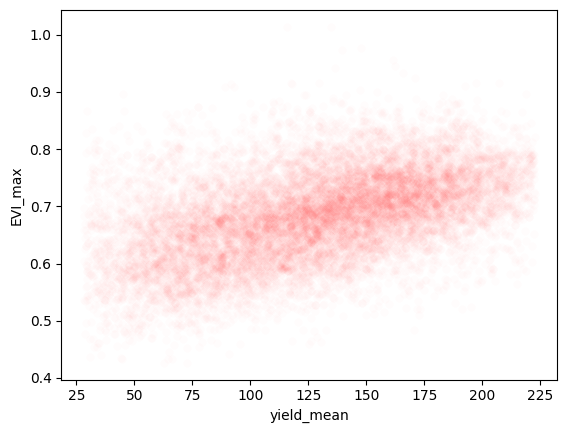

#############################################################################
EVI_mean


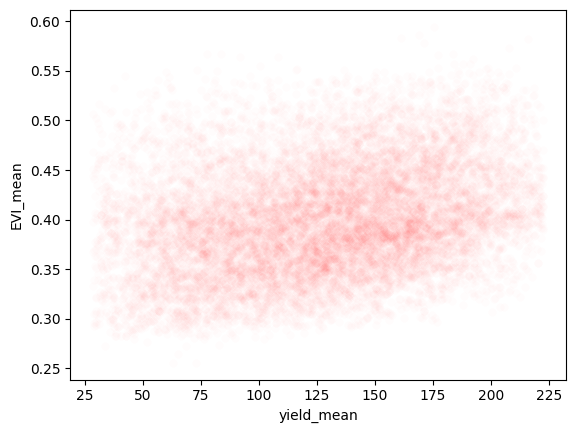

#############################################################################
EVI_range


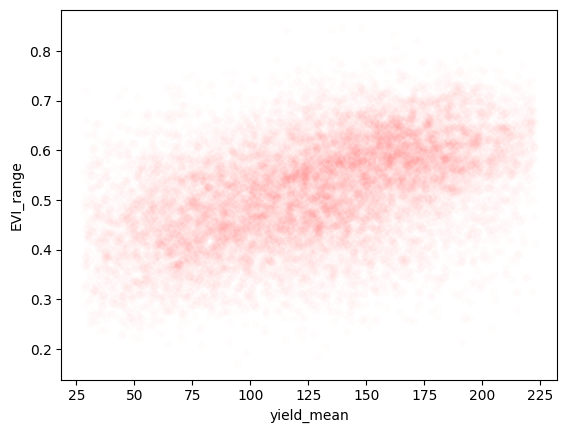

#############################################################################
GI_max


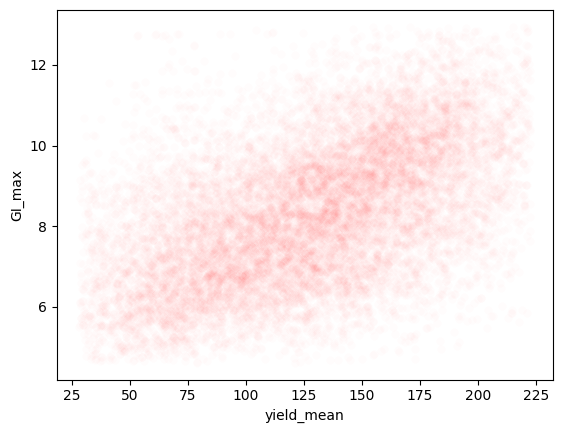

#############################################################################
GI_mean


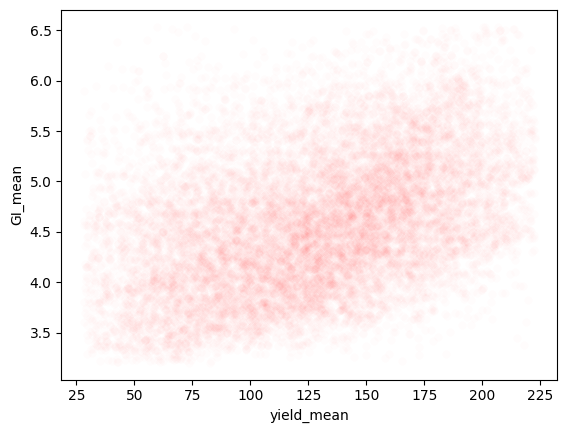

#############################################################################
GI_range


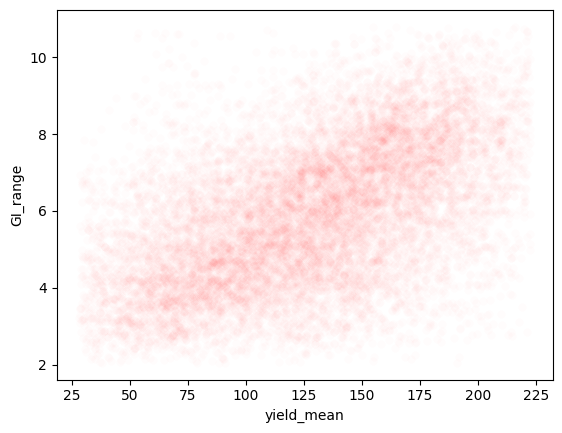

#############################################################################
LST_max


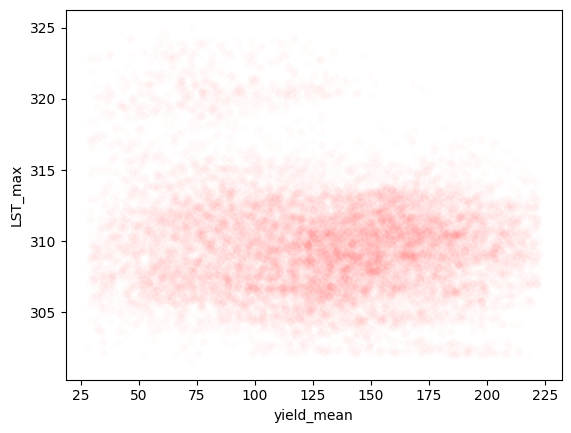

#############################################################################
LST_median


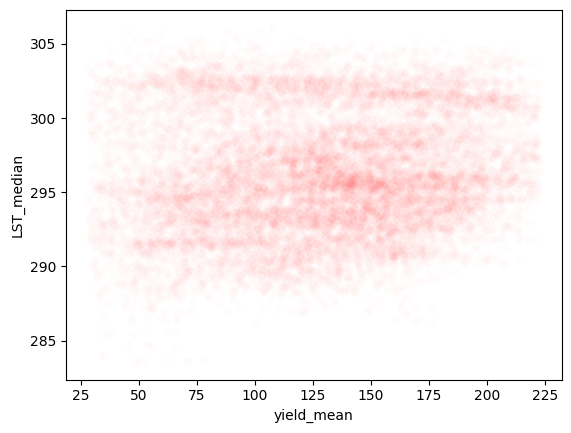

#############################################################################
LST_range


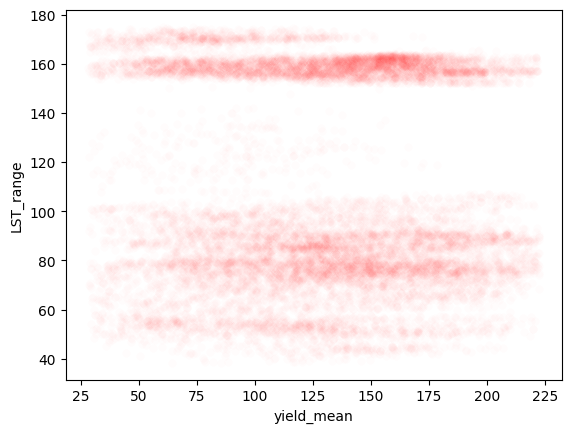

#############################################################################
NDVI_max


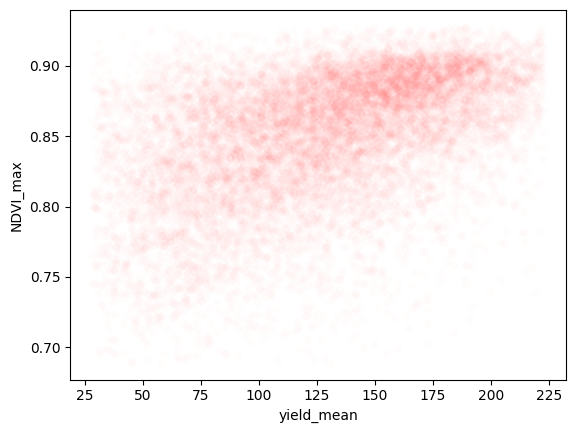

#############################################################################
NDVI_mean


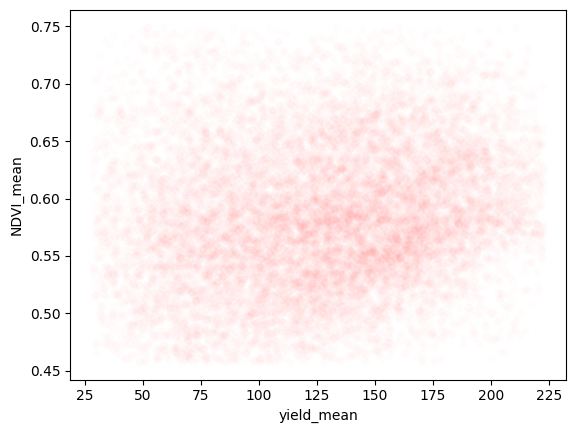

#############################################################################
NDVI_range


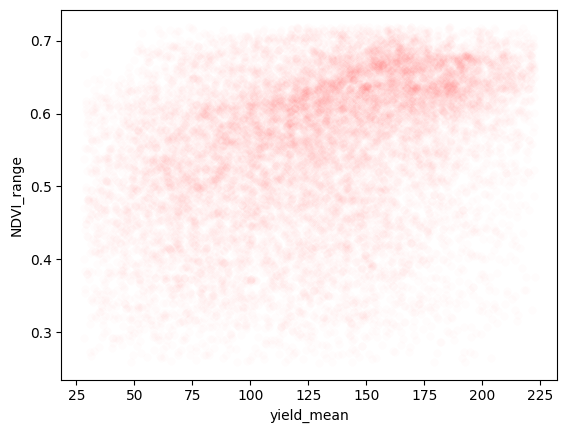

#############################################################################
NDWI_max


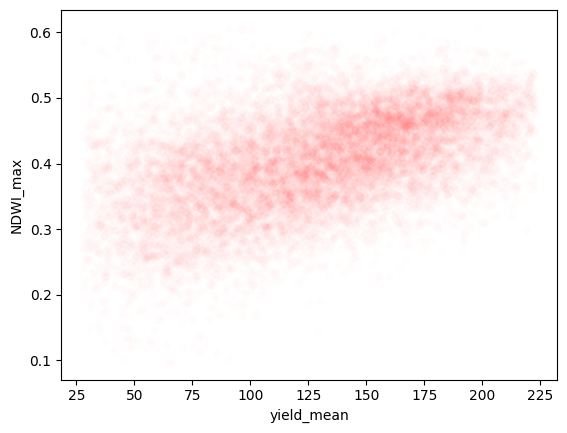

#############################################################################
NDWI_mean


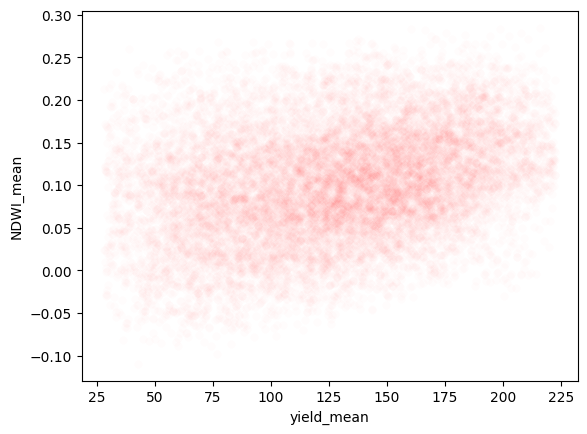

#############################################################################
NDWI_range


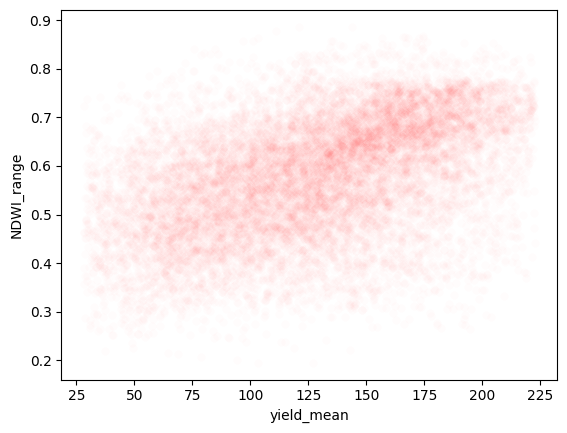

#############################################################################
Precip_Max_mm


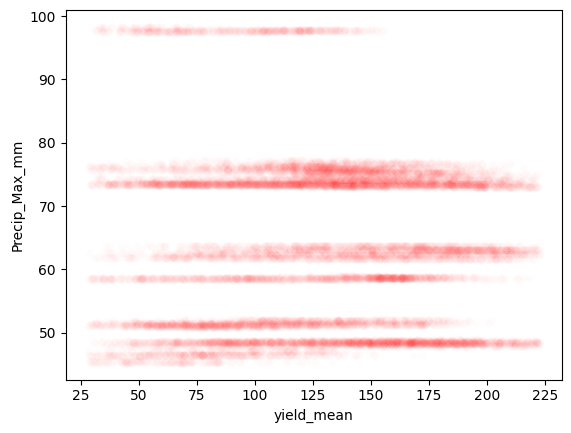

#############################################################################
Precip_Mean_mm


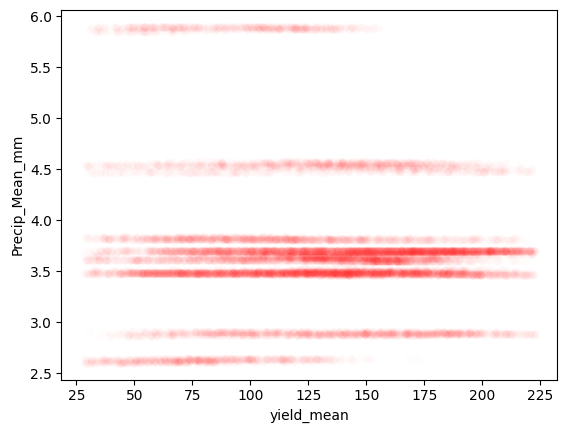

#############################################################################
Precip_Total_mm


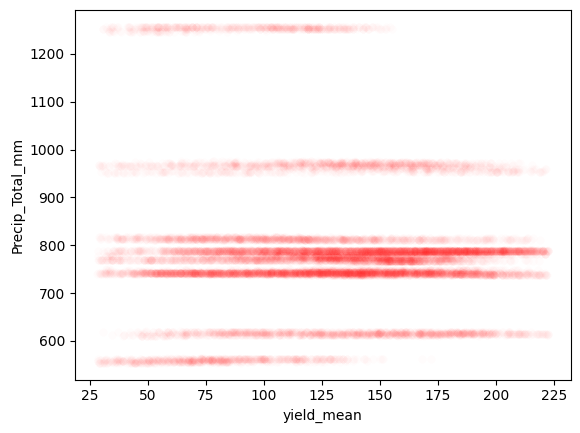

#############################################################################
Soil_Alpha


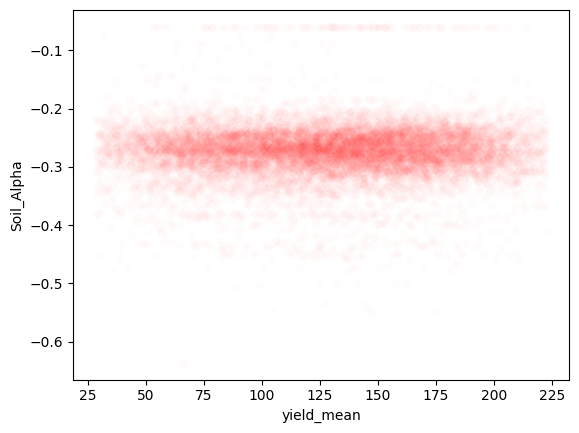

#############################################################################
Soil_BD


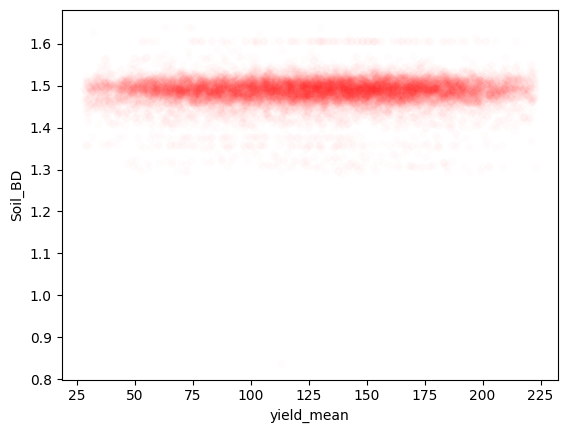

#############################################################################
Soil_Clay


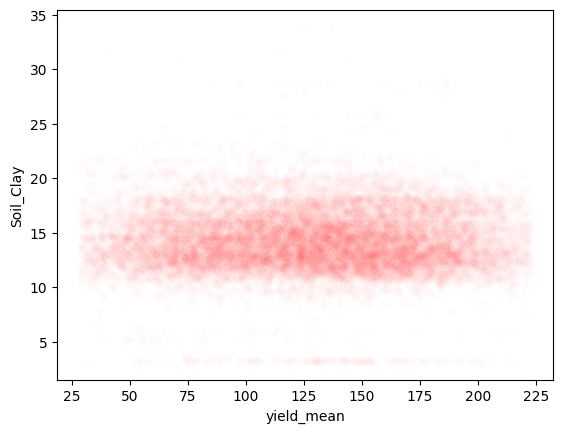

#############################################################################
Soil_Ksat


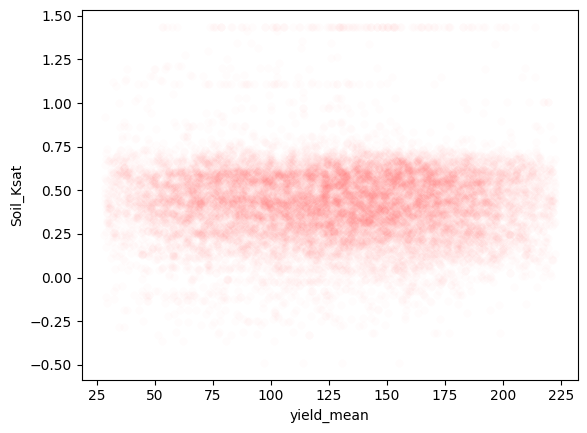

#############################################################################
Soil_Lambda


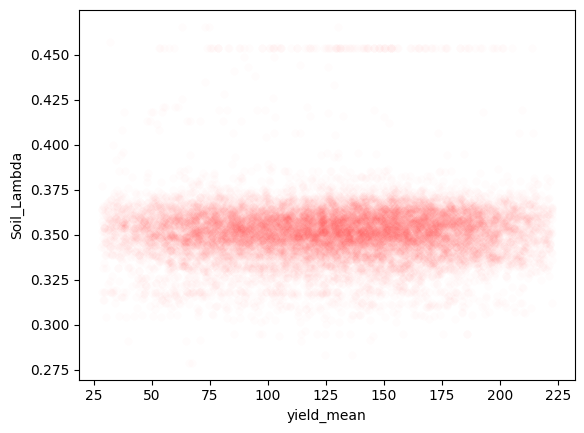

#############################################################################
Soil_N


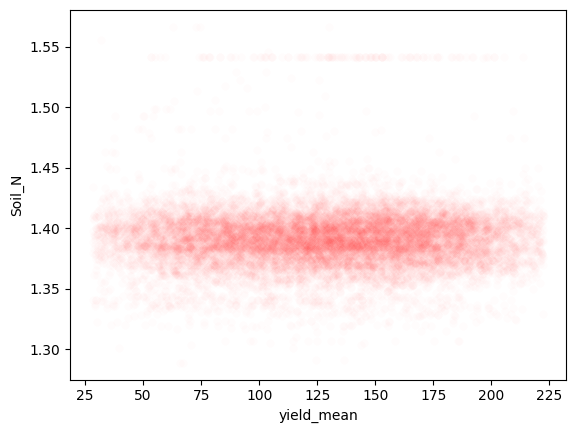

#############################################################################
Soil_OM


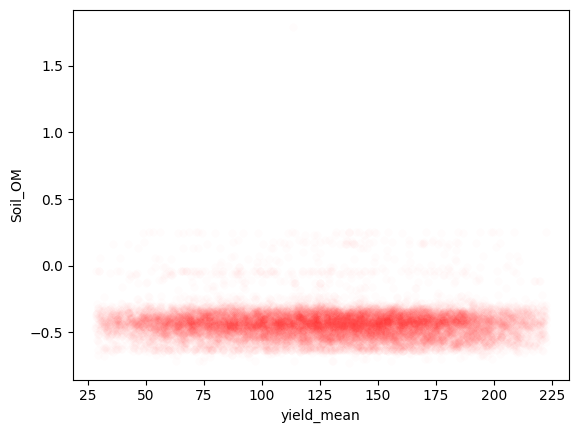

#############################################################################
Soil_Sand


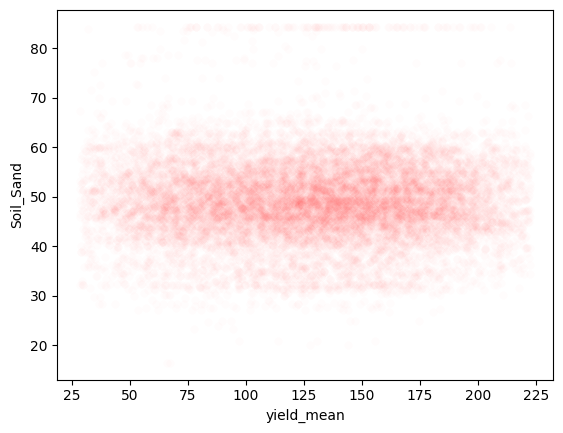

#############################################################################
Soil_Silt


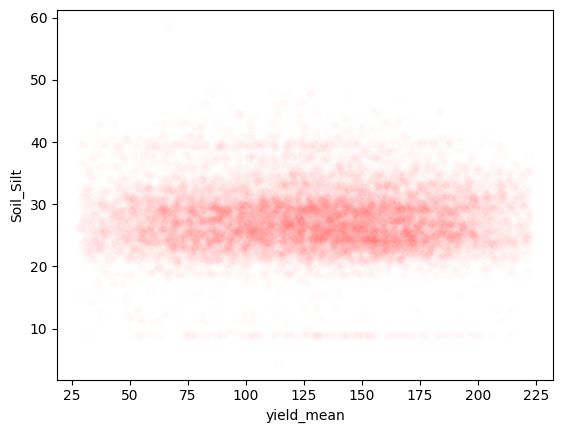

#############################################################################
Soil_Theta_R


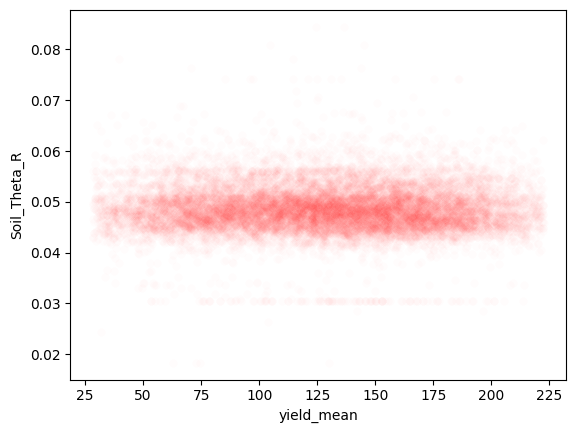

#############################################################################
Soil_Theta_S


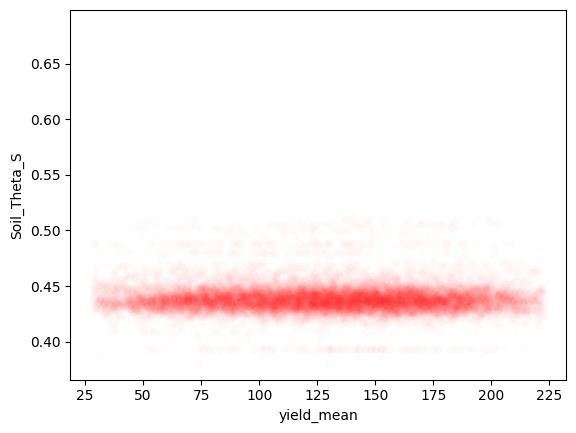

#############################################################################
Soil_pH


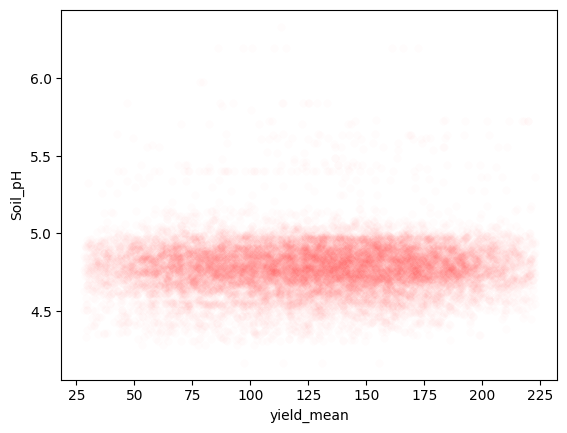

#############################################################################
Tr_SWIR1_max


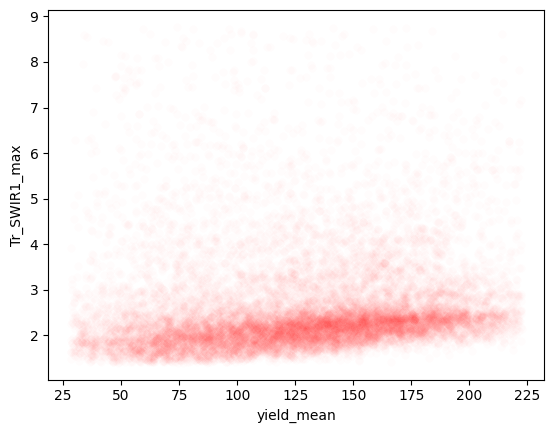

#############################################################################
Tr_SWIR1_mean


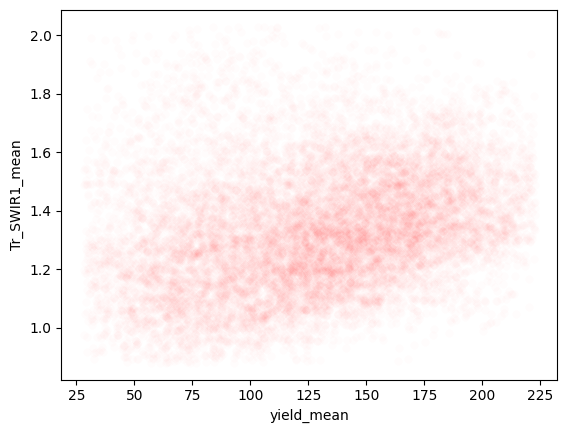

#############################################################################
Tr_SWIR1_range


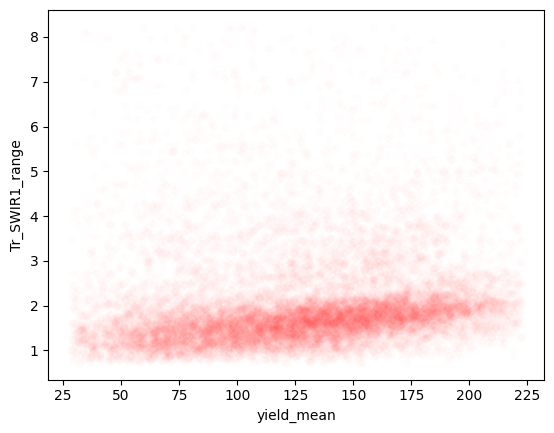

#############################################################################
Tr_SWIR2_max


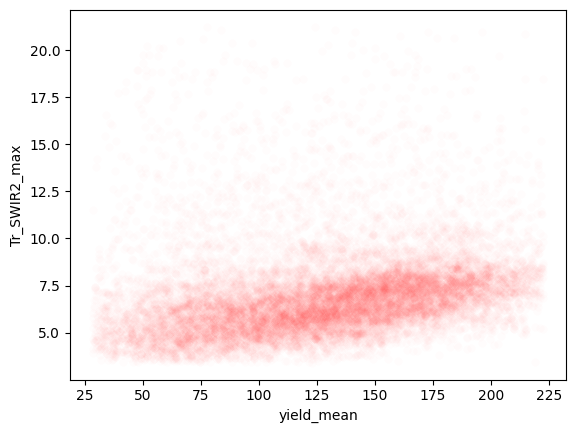

#############################################################################
Tr_SWIR2_mean


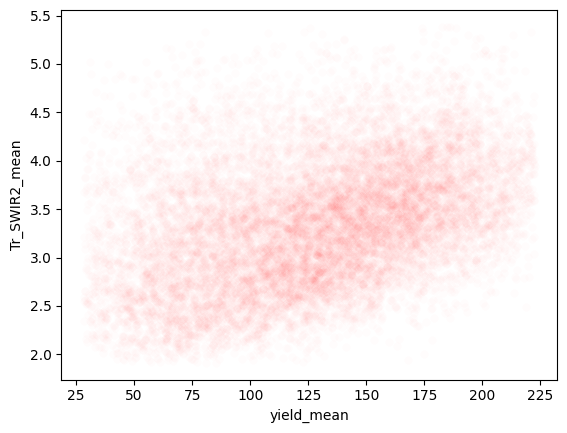

#############################################################################
Tr_SWIR2_range


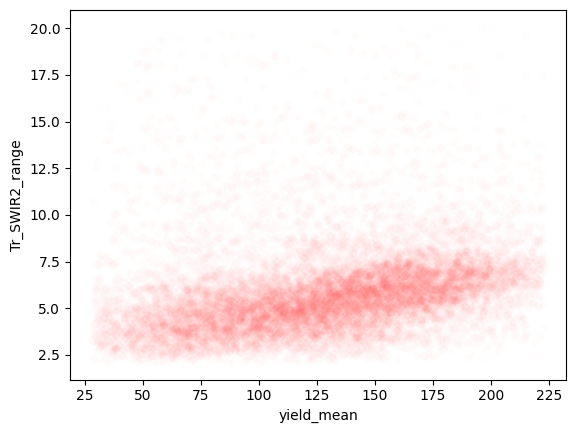

#############################################################################
elevation


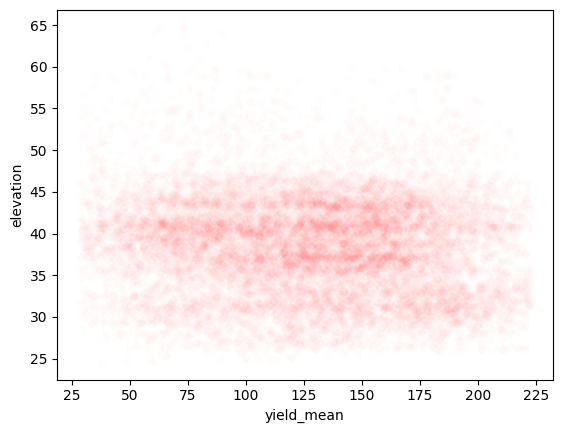

#############################################################################
slope


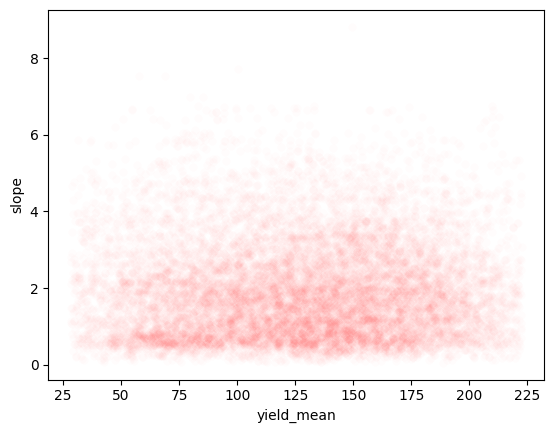

#############################################################################
aspect


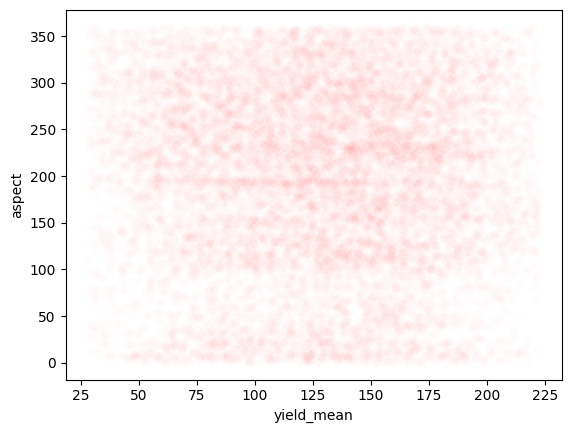

#############################################################################
yield_mean


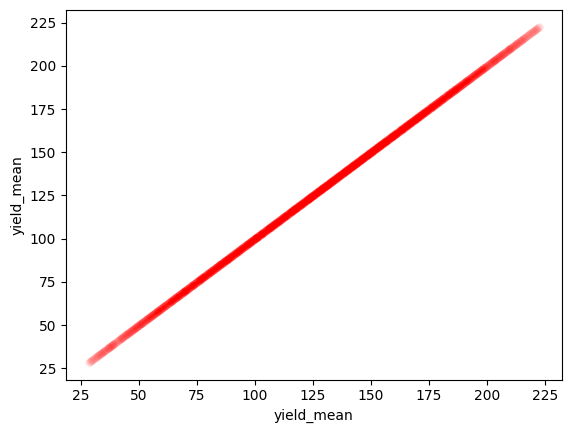

#############################################################################
year


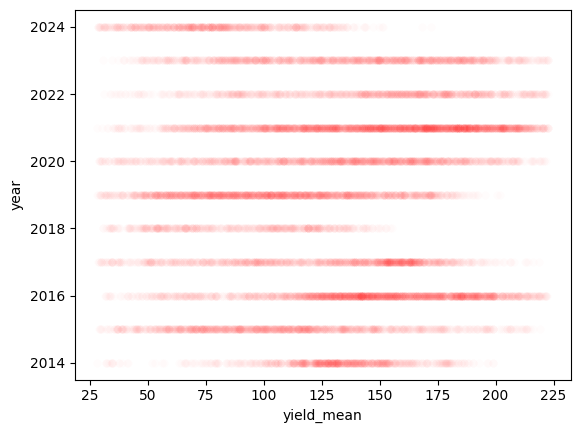

#############################################################################
field


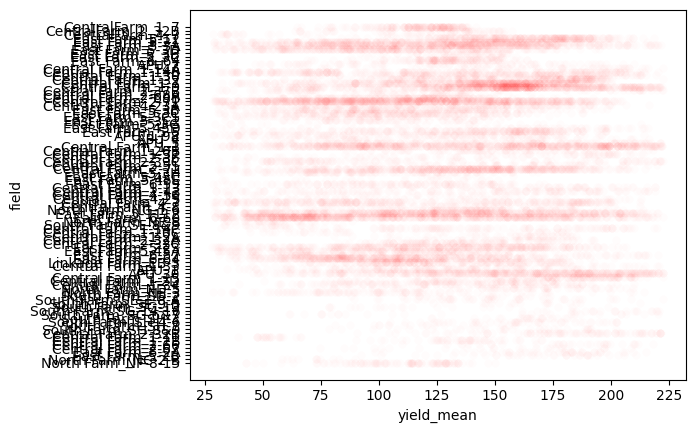

#############################################################################


In [9]:
for key in df.keys():
  print(key)
  sns.scatterplot(data=df, x='yield_mean', y=key, color= "red", alpha = 0.01)
  plt.show()
  print("#############################################################################")


In [10]:
import numpy as np

YIELD_COL = "yield_mean"
TAIL = 0.02  # 2% tails

EXCLUDE_COLS = {
    'year', 'field', YIELD_COL
}

# -------------------------
# Step 1) Trim extreme 2% of yield (both tails)
# -------------------------
y_lo = df[YIELD_COL].quantile(TAIL)
y_hi = df[YIELD_COL].quantile(1 - TAIL)

mask_yield_ok = df[YIELD_COL].between(y_lo, y_hi)
df = df.loc[mask_yield_ok].copy()

# -------------------------
# Step 2) One-shot trim extremes (2% tails) for ALL numeric features
# -------------------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [
    "GI_max", "GI_mean", "GI_range",
    "NDVI_max", "NDVI_mean", "NDVI_range",
    # 'Soil_Alpha',
    #    'Soil_BD', 'Soil_Clay', 'Soil_Ksat', 'Soil_Lambda', 'Soil_N', 'Soil_OM',
    #    'Soil_Sand', 'Soil_Silt', 'Soil_Theta_R', 'Soil_Theta_S', 'Soil_pH',
       'Tr_SWIR1_max', 'Tr_SWIR1_mean', 'Tr_SWIR1_range', 'Tr_SWIR2_max',
       'Tr_SWIR2_mean', 'Tr_SWIR2_range',
]

feature_cols = ['elevation', 'Tr_SWIR1_max', 'Tr_SWIR1_range', 'Tr_SWIR2_max',   'Tr_SWIR2_range',]

# If you want to ignore columns with all-NaN or near-constant behavior:
feature_cols = [c for c in feature_cols if df[c].notna().any()]

q_low  = df[feature_cols].quantile(TAIL)
q_high = df[feature_cols].quantile(1 - TAIL)

low_extreme  = df[feature_cols].lt(q_low, axis="columns")
high_extreme = df[feature_cols].gt(q_high, axis="columns")

# (Optional but recommended) treat NaN in any feature as "bad row"
any_missing = df[feature_cols].isna().any(axis=1)

any_extreme = (low_extreme | high_extreme).any(axis=1)

df = df.loc[~(any_extreme | any_missing)].copy()

print("df updated.")
print("Final rows:", len(df))
print("Removed due to extremes:", int(any_extreme.sum()))
print("Removed due to missing:", int(any_missing.sum()))


df updated.
Final rows: 11823
Removed due to extremes: 1487
Removed due to missing: 0


## Visualizing dataset

<Axes: xlabel='yield_mean', ylabel='Density'>

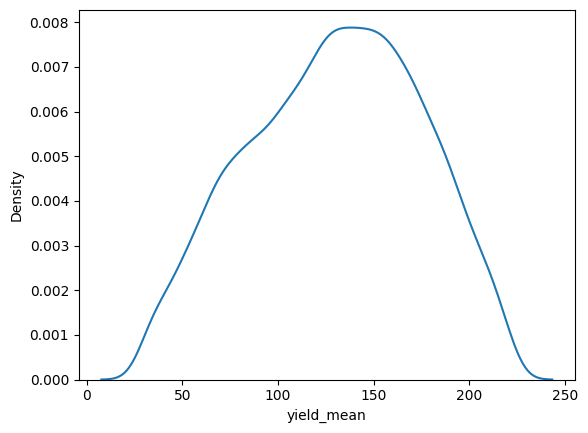

In [11]:
sns.kdeplot(data=df, x="yield_mean")

### Getting a subset of dataset

In [ ]:
# ==== SIMPLE SAMPLER (run this first) ====
import numpy as np
import pandas as pd

# ---- USER KNOBS (edit these) ----
SEED = 42
TARGET_COL = "yield"
FIELD_COL  = "field"
YEAR_COL   = "year"

SAMPLE_SIZE_TARGET = 50_000   # typical: 50k (try 80k–100k if you have resources)
MIN_PER_GROUP      = 130      # ensure coverage per field×year
MAX_PER_GROUP      = 1000     # avoid domination by big groups
BASE_FRAC          = 0.10     # start by taking ~10% from each group
# --------------------------------

rng = np.random.default_rng(SEED)
df = df_wheat.copy()

# Build group key
df["field_year"] = df[FIELD_COL].astype(str) + "_" + df[YEAR_COL].astype(str)

# Group sizes and initial allocation
gsize = df.groupby("field_year").size()
alloc = np.ceil(gsize * BASE_FRAC).astype(int)
alloc = alloc.clip(lower=MIN_PER_GROUP, upper=MAX_PER_GROUP)
alloc = np.minimum(alloc, gsize)  # cannot exceed what's available

# Simple adjuster to match SAMPLE_SIZE_TARGET (no fancy math; easy to read)
def adjust_allocation_simple(alloc, target, gsize, min_k, max_k):
    alloc = alloc.copy()
    total = int(alloc.sum())

    # Scale DOWN by peeling 1 at a time from the largest groups (above min_k)
    while total > target:
        # candidates that can give 1 back
        can_give = alloc[alloc > min_k]
        if can_give.empty:
            break
        idx = can_give.sort_values(ascending=False).index[0]
        alloc.loc[idx] -= 1
        total -= 1

    # Scale UP by adding 1 at a time to groups with headroom
    while total < target:
        headroom = (np.minimum(max_k, gsize) - alloc)
        can_take = headroom[headroom > 0]
        if can_take.empty:
            break
        # give to the group currently smallest (for balance)
        idx = (alloc.loc[can_take.index]).sort_values(ascending=True).index[0]
        alloc.loc[idx] += 1
        total += 1

    return alloc

alloc = adjust_allocation_simple(
    alloc=alloc,
    target=SAMPLE_SIZE_TARGET,
    gsize=gsize,
    min_k=MIN_PER_GROUP,
    max_k=MAX_PER_GROUP
)

# Draw samples per group (reproducible)
sampled_parts = []
for gy, k in alloc.items():
    if k <= 0:
        continue
    gdf = df[df["field_year"] == gy]
    sampled_parts.append(gdf.sample(n=int(k), random_state=SEED, replace=False))

sampled_tuning_set = pd.concat(sampled_parts, ignore_index=True)

# Quick report
total_groups = df["field_year"].nunique()
covered_groups = sampled_tuning_set["field_year"].nunique()
per_group_counts = sampled_tuning_set.groupby("field_year").size()

print("=== Sampling Summary ===")
print(f"Requested size: {SAMPLE_SIZE_TARGET:,}")
print(f"Actual size:    {len(sampled_tuning_set):,}")
print(f"Groups covered: {covered_groups}/{total_groups} "
      f"({covered_groups/total_groups*100:.1f}%)")
print(f"Median per-group sample: {int(per_group_counts.median())}")

# Keep only what we need going forward (optional but tidy)
# sampled_tuning_set now holds your training sample for cell 2.


=== Sampling Summary ===
Requested size: 50,000
Actual size:    50,000
Groups covered: 97/97 (100.0%)
Median per-group sample: 541


In [ ]:
df_soybeans.keys()

Index(['x', 'y', 'yield', 'field', 'year', 'ndvi_mean', 'ndvi_max',
       'ndvi_range', 'lst_median_k', 'lst_range_k', 'lst_max_k',
       'pr_season_mm', 'pr_mean_mm_day', 'pr_max_mm_day', 'pr_range_mm_day',
       'aridity', 'theta_s', 'clay_pct', 'ksat', 'evi_mean', 'evi_max',
       'evi_range', 'gi_mean', 'gi_max', 'gi_range', 'ndwi_mean', 'ndwi_max',
       'ndwi_range', 'tr_swir1_mean', 'tr_swir1_max', 'tr_swir1_range',
       'tr_swir2_mean', 'tr_swir2_max', 'tr_swir2_range', 'elevation', 'slope',
       'aspect', 'elevation_squared', 'slope_squared', 'elev_slope',
       'elev_aspect', 'slope_aspect', 'ndvi_pr', 'aspect_southness',
       'fall_aridity', 'fall_pr_max_mm_day', 'fall_pr_mean_mm_day',
       'fall_pr_range_mm_day', 'fall_pr_season_mm', 'spring_aridity',
       'spring_pr_max_mm_day', 'spring_pr_mean_mm_day',
       'spring_pr_range_mm_day', 'spring_pr_season_mm', 'summer_aridity',
       'summer_pr_max_mm_day', 'summer_pr_mean_mm_day',
       'summer_pr_range_mm

## Data Preparation

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler

def prepare_data(
    df,
    feature_columns,
    target_column="yield",
    test_year=None,
    year_col="year",              # auto-detect if None
    crop_col=None,              # optional auto-detect
    log_target=True,           # True => model predicts log1p(y)
    return_cnn_inputs=True
):
    """
    Prepare train/test split by year, impute using train stats, scale X and y,
    and optionally reshape X for Conv1D: (N, n_features, 1).

    Returns a dict with arrays + scalers + raw splits.
    """

    df = df.copy()
    print(f"Original dataset shape: {df.shape}")

    # ---------- 2) Determine TEST_YEAR ----------
    if test_year is None:
        # default: hold out max year
        test_year = int(pd.to_numeric(df[year_col], errors="coerce").dropna().max())
    print(f"Using year column: '{year_col}' | TEST_YEAR: {test_year}")

    # Ensure year is numeric (safe comparisons)
    df[year_col] = pd.to_numeric(df[year_col], errors="coerce")
    df = df.dropna(subset=[year_col]).copy()

    # ---------- 3) Split ----------
    test_data = df[df[year_col] == test_year].copy()
    train_data = df[df[year_col] != test_year].copy()

    print(f"Training data (years != {test_year}): {train_data.shape}")
    print(f"Test data (year = {test_year}): {test_data.shape}")

    if len(test_data) == 0:
        raise ValueError(f"No rows found for test_year={test_year}. Check your year values.")

    # ---------- 4) Build X/y ----------
    # Keep only columns that exist
    feature_columns = [c for c in feature_columns if c in df.columns]
    if len(feature_columns) == 0:
        raise ValueError("None of the feature_columns exist in df.")

    # Numeric-only features (Conv1D needs numbers)
    X_train = train_data[feature_columns].copy()
    X_test  = test_data[feature_columns].copy()

    # Drop non-numeric columns safely
    X_train = X_train.apply(pd.to_numeric, errors="coerce")
    X_test  = X_test.apply(pd.to_numeric, errors="coerce")

    # Target
    y_train = pd.to_numeric(train_data[target_column], errors="coerce")
    y_test  = pd.to_numeric(test_data[target_column], errors="coerce")

    # Drop rows where y is missing
    train_mask = y_train.notna()
    test_mask  = y_test.notna()

    X_train = X_train.loc[train_mask].copy()
    y_train = y_train.loc[train_mask].copy()

    X_test = X_test.loc[test_mask].copy()
    y_test = y_test.loc[test_mask].copy()

    # ---------- 5) Impute using TRAIN stats only ----------
    train_means = X_train.mean(numeric_only=True)
    X_train = X_train.fillna(train_means)
    X_test  = X_test.fillna(train_means)

    # ---------- 6) Optional target transform ----------
    if log_target:
        # must be nonnegative; if yield can be 0, log1p is safe
        y_train_t = np.log1p(y_train.values.astype("float32"))
        y_test_t  = np.log1p(y_test.values.astype("float32"))
    else:
        y_train_t = y_train.values.astype("float32")
        y_test_t  = y_test.values.astype("float32")

    # ---------- 7) Scale ----------
    scaler_X = RobustScaler()
    X_train_scaled = scaler_X.fit_transform(X_train).astype("float32")
    X_test_scaled  = scaler_X.transform(X_test).astype("float32")

    scaler_y = RobustScaler()
    y_train_scaled = scaler_y.fit_transform(y_train_t.reshape(-1, 1)).ravel().astype("float32")
    y_test_scaled  = scaler_y.transform(y_test_t.reshape(-1, 1)).ravel().astype("float32")

    # ---------- 8) Conv1D reshape ----------
    out = {
        "X_train_scaled": X_train_scaled,
        "X_test_scaled": X_test_scaled,
        "y_train_scaled": y_train_scaled,
        "y_test_scaled": y_test_scaled,
        "scaler_X": scaler_X,
        "scaler_y": scaler_y,
        "X_train_raw": X_train,
        "y_train_raw": y_train,
        "X_test_raw": X_test,
        "y_test_raw": y_test,
        "feature_columns_used": list(X_train.columns),
        "test_year": test_year,
        "year_col": year_col,
        "log_target": log_target,
    }

    if return_cnn_inputs:
        out["X_train_cnn"] = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
        out["X_test_cnn"]  = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

    return out


In [16]:
df.shape

(11823, 42)

In [17]:
df.keys()


Index(['EVI_max', 'EVI_mean', 'EVI_range', 'GI_max', 'GI_mean', 'GI_range',
       'LST_max', 'LST_median', 'LST_range', 'NDVI_max', 'NDVI_mean',
       'NDVI_range', 'NDWI_max', 'NDWI_mean', 'NDWI_range', 'Precip_Max_mm',
       'Precip_Mean_mm', 'Precip_Total_mm', 'Soil_Alpha', 'Soil_BD',
       'Soil_Clay', 'Soil_Ksat', 'Soil_Lambda', 'Soil_N', 'Soil_OM',
       'Soil_Sand', 'Soil_Silt', 'Soil_Theta_R', 'Soil_Theta_S', 'Soil_pH',
       'Tr_SWIR1_max', 'Tr_SWIR1_mean', 'Tr_SWIR1_range', 'Tr_SWIR2_max',
       'Tr_SWIR2_mean', 'Tr_SWIR2_range', 'elevation', 'slope', 'aspect',
       'yield_mean', 'year', 'field'],
      dtype='object')

In [18]:
TARGET_COLUMN = 'yield_mean'
TEST_YEAR = 2017

feature_columns = [
    # 'ndvi_mean', 'ndvi_max', 'ndvi_range', 'lst_median_k', 'lst_range_k',
    # 'lst_max_k', 'pr_season_mm', 'pr_max_mm_day', 'pr_range_mm_day',
    # 'aridity', 'theta_s', 'clay_pct', 'ksat', 'evi_mean', 'evi_max',
    # 'evi_range', 'gi_mean', 'gi_max', 'gi_range', 'ndwi_mean', 'ndwi_max',
    # 'ndwi_range', 'tr_swir1_mean', 'tr_swir1_max', 'tr_swir1_range',
    # 'tr_swir2_mean', 'tr_swir2_max', 'tr_swir2_range', 'elevation', 'slope',
    # 'aspect', 'elevation_squared', 'slope_squared', 'elev_slope',
    # 'elev_aspect', 'slope_aspect', 'ndvi_pr', 'aspect_southness'


    'EVI_max', 'EVI_mean', 'EVI_range', 'GI_max', 'GI_mean', 'GI_range',
       'LST_max', 'LST_median', 'LST_range', 'NDVI_max', 'NDVI_mean',
       'NDVI_range', 'NDWI_max', 'NDWI_mean', 'NDWI_range', 'Precip_Max_mm',
       'Precip_Mean_mm', 'Precip_Total_mm', 'Soil_Alpha', 'Soil_BD',
       'Soil_Clay', 'Soil_Ksat', 'Soil_Lambda', 'Soil_N', 'Soil_OM',
       'Soil_Sand', 'Soil_Silt', 'Soil_Theta_R', 'Soil_Theta_S', 'Soil_pH',
       'Tr_SWIR1_max', 'Tr_SWIR1_mean', 'Tr_SWIR1_range', 'Tr_SWIR2_max',
       'Tr_SWIR2_mean', 'Tr_SWIR2_range', 'elevation', 'slope', 'aspect'
]


data = prepare_data(
    df=df,
    feature_columns=feature_columns,
    target_column="yield_mean",
    test_year=TEST_YEAR,
    log_target=False,
    return_cnn_inputs=True
)

X_train_cnn = data["X_train_cnn"]
X_test_cnn  = data["X_test_cnn"]
y_train     = data["y_train_scaled"]
y_test      = data["y_test_scaled"]

print(X_train_cnn.shape, X_test_cnn.shape)

Original dataset shape: (11823, 42)
Using year column: 'year' | TEST_YEAR: 2017
Training data (years != 2017): (10815, 42)
Test data (year = 2017): (1008, 42)
(10815, 39, 1) (1008, 39, 1)


## Developing the model


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

tf.keras.backend.clear_session()

n_features = X_train_cnn.shape[1]

model = models.Sequential([
    layers.Input(shape=(n_features, 1)),

    layers.Conv1D(512, kernel_size=3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.2),

    layers.Conv1D(256, kernel_size=3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Dropout(0.2),

    layers.Conv1D(128, kernel_size=3, padding="same"),
    layers.BatchNormalization(),
    layers.Activation("relu"),

    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),

    layers.Dense(1)  # regression output
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.Huber(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 39, 512)        │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 39, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 39, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 39, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 39, 256)        │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 39, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 39, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 39, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 39, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 39, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 39, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,857 (1.93 MB)

 Trainable params: 504,065 (1.92 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

tf.keras.backend.clear_session()
n_features = X_train_cnn.shape[1]

norm = layers.Normalization()
norm.adapt(X_train_cnn.reshape(-1, n_features))  # adapt on train only

wd = 1e-3

inp = layers.Input(shape=(n_features, 1))
x = layers.Reshape((n_features,))(inp)
x = norm(x)
x = layers.Reshape((n_features, 1))(x)

for f in [64, 64, 32]:
    x = layers.SeparableConv1D(
        f, 3, padding="same",
        depthwise_regularizer=regularizers.l2(wd),
        pointwise_regularizer=regularizers.l2(wd)
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.2)(x)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(wd))(x)
x = layers.Dropout(0.4)(x)
out = layers.Dense(1)(x)

model = tf.keras.Model(inp, out)
model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=3e-4, weight_decay=1e-4),
    loss=tf.keras.losses.Huber(delta=10.0),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)


In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", patience=10, factor=0.5),
]

history = model.fit(
    X_train_cnn, y_train,
    validation_split=0.35,
    epochs=500,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 263ms/step - loss: 0.3664 - mean_absolute_error: 0.5188 - val_loss: 0.3784 - val_mean_absolute_error: 0.5679 - learning_rate: 3.0000e-04
Epoch 2/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3152 - mean_absolute_error: 0.4668 - val_loss: 0.3640 - val_mean_absolute_error: 0.5673 - learning_rate: 3.0000e-04
Epoch 3/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3006 - mean_absolute_error: 0.4654 - val_loss: 0.3507 - val_mean_absolute_error: 0.5659 - learning_rate: 3.0000e-04
Epoch 4/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2777 - mean_absolute_error: 0.4487 - val_loss: 0.3382 - val_mean_absolute_error: 0.5629 - learning_rate: 3.0000e-04
Epoch 5/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2670 - mean_absolute_error: 0.4534 - val_loss: 0.3263 - val_mean_absolute_error: 0.5579 - learning_rate: 3.0000e-04
Epoch 6/500
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2560 - mean_absolute_error: 0.4489 - val_loss: 0.30

In [22]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1) Predict in scaled space
y_pred_s = model.predict(X_test_cnn, batch_size=2048).ravel()

# 2) Inverse-transform BOTH y_true and y_pred back to yield units
scaler_y = data["scaler_y"]

y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()
y_pred = scaler_y.inverse_transform(y_pred_s.reshape(-1, 1)).ravel()

# 3) Metrics in yield units
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae  = mean_absolute_error(y_true, y_pred)
r2   = r2_score(y_true, y_pred)

# 4) Pearson correlation and correlation^2
r = np.corrcoef(y_true, y_pred)[0, 1]
r_sq = r**2

# 5) Extra diagnostics (optional but useful)
bias = np.mean(y_pred - y_true)          # positive => over-prediction
n = len(y_true)

print(
    f"Soybeans Test (Year={data['test_year']}) | n={n}\n"
    f"R2: {r2:.3f} | r: {r:.3f} | r^2(corr^2): {r_sq:.3f}\n"
    f"RMSE: {rmse:.3f} | MAE: {mae:.3f} | Bias: {bias:.3f}"
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Soybeans Test (Year=2017) | n=1008
R2: 0.120 | r: 0.488 | r^2(corr^2): 0.238
RMSE: 39.414 | MAE: 30.180 | Bias: 13.926


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def eval_predictions(model, data, X_test_cnn, y_test_scaled, batch_size=2048):
    # Predict in scaled space
    y_pred_scaled = model.predict(X_test_cnn, batch_size=batch_size).ravel()

    # Inverse transform to yield units
    scaler_y = data["scaler_y"]
    y_true = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    r = np.corrcoef(y_true, y_pred)[0, 1]
    r_sq = r**2

    out = {
        "y_true": y_true,
        "y_pred": y_pred,
        "rmse": rmse,
        "mae": mae,
        "r2": r2,
        "r": r,
        "r_sq": r_sq,
        "residuals": y_pred - y_true,
    }
    return out

def plot_training_curves(history):
    hist = history.history

    # ---- Loss curve ----
    plt.figure()
    plt.plot(hist.get("loss", []), label="train loss")
    if "val_loss" in hist:
        plt.plot(hist["val_loss"], label="val loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curve (Train vs Validation)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # ---- MAE curve (if available) ----
    mae_key = None
    for k in ["mean_absolute_error", "mae"]:
        if k in hist:
            mae_key = k
            break

    if mae_key is not None:
        plt.figure()
        plt.plot(hist[mae_key], label=f"train {mae_key}")
        val_key = f"val_{mae_key}"
        if val_key in hist:
            plt.plot(hist[val_key], label=f"val {mae_key}")
        plt.xlabel("Epoch")
        plt.ylabel("MAE")
        plt.title("MAE Curve (Train vs Validation)")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()


def plot_prediction_diagnostics(y_true, y_pred, title_prefix="Test"):
    residuals = y_pred - y_true

    # ---- Pred vs True ----
    plt.figure()
    plt.scatter(y_true, y_pred, s=8, alpha=0.35)
    mn = min(y_true.min(), y_pred.min())
    mx = max(y_true.max(), y_pred.max())
    plt.plot([mn, mx], [mn, mx])  # 1:1 line
    plt.xlabel("True Yield")
    plt.ylabel("Predicted Yield")
    plt.title(f"{title_prefix}: Predicted vs True")
    plt.grid(True, alpha=0.3)
    plt.show()

    # ---- Residual histogram ----
    plt.figure()
    plt.hist(residuals, bins=50, alpha=0.85)
    plt.xlabel("Residual (Pred - True)")
    plt.ylabel("Count")
    plt.title(f"{title_prefix}: Residual Distribution")
    plt.grid(True, alpha=0.3)
    plt.show()

    # ---- Residual vs Pred ----
    plt.figure()
    plt.scatter(y_pred, residuals, s=8, alpha=0.35)
    plt.axhline(0)
    plt.xlabel("Predicted Yield")
    plt.ylabel("Residual (Pred - True)")
    plt.title(f"{title_prefix}: Residuals vs Predicted (Error Pattern)")
    plt.grid(True, alpha=0.3)
    plt.show()

    # ---- Absolute error vs True ----
    abs_err = np.abs(residuals)
    plt.figure()
    plt.scatter(y_true, abs_err, s=8, alpha=0.35)
    plt.xlabel("True Yield")
    plt.ylabel("|Residual|")
    plt.title(f"{title_prefix}: Absolute Error vs True Yield")
    plt.grid(True, alpha=0.3)
    plt.show()


def plot_error_by_bins(y_true, y_pred, bins=10, title_prefix="Test"):
    residuals = y_pred - y_true
    abs_err = np.abs(residuals)

    # Bin by true yield quantiles
    qs = np.linspace(0, 1, bins + 1)
    edges = np.quantile(y_true, qs)
    # Make edges strictly increasing
    edges = np.unique(edges)
    if len(edges) < 3:
        print("Not enough unique values to bin.")
        return

    bin_ids = np.digitize(y_true, edges[1:-1], right=True)
    centers = []
    mean_abs_err = []
    mean_bias = []
    counts = []

    for b in range(len(edges) - 1):
        m = bin_ids == b
        if m.sum() == 0:
            continue
        centers.append(np.mean(y_true[m]))
        mean_abs_err.append(np.mean(abs_err[m]))
        mean_bias.append(np.mean(residuals[m]))
        counts.append(m.sum())

    plt.figure()
    plt.plot(centers, mean_abs_err, marker="o")
    plt.xlabel("Mean True Yield (bin)")
    plt.ylabel("Mean |Residual|")
    plt.title(f"{title_prefix}: Mean Absolute Error by Yield Bins")
    plt.grid(True, alpha=0.3)
    plt.show()

    plt.figure()
    plt.plot(centers, mean_bias, marker="o")
    plt.axhline(0)
    plt.xlabel("Mean True Yield (bin)")
    plt.ylabel("Mean Bias (Pred - True)")
    plt.title(f"{title_prefix}: Bias by Yield Bins")
    plt.grid(True, alpha=0.3)
    plt.show()

    plt.figure()
    plt.bar(range(len(counts)), counts)
    plt.xlabel("Bin index (low → high yield)")
    plt.ylabel("Count")
    plt.title(f"{title_prefix}: Samples per Yield Bin")
    plt.grid(True, axis="y", alpha=0.3)
    plt.show()


def permutation_importance_cnn(
    model, data, X_test_scaled_2d, y_test_scaled,
    feature_names, n_repeats=3, metric="rmse", batch_size=2048, seed=42
):
    """
    X_test_scaled_2d: shape (N, F) - use data["X_test_scaled"] or reconstruct it
    """
    rng = np.random.default_rng(seed)

    # baseline
    X_base_cnn = X_test_scaled_2d.reshape(X_test_scaled_2d.shape[0], X_test_scaled_2d.shape[1], 1)
    base = eval_predictions(model, data, X_base_cnn, y_test_scaled, batch_size=batch_size)
    base_rmse = base["rmse"]
    base_mae = base["mae"]

    importances = []

    for j, name in enumerate(feature_names):
        deltas = []
        for _ in range(n_repeats):
            X_perm = X_test_scaled_2d.copy()
            rng.shuffle(X_perm[:, j])  # shuffle one column
            X_perm_cnn = X_perm.reshape(X_perm.shape[0], X_perm.shape[1], 1)

            out = eval_predictions(model, data, X_perm_cnn, y_test_scaled, batch_size=batch_size)
            if metric == "rmse":
                deltas.append(out["rmse"] - base_rmse)
            elif metric == "mae":
                deltas.append(out["mae"] - base_mae)
            else:
                raise ValueError("metric must be 'rmse' or 'mae'")

        importances.append((name, float(np.mean(deltas)), float(np.std(deltas))))

    # sort by mean delta descending (bigger worse => more important)
    importances.sort(key=lambda x: x[1], reverse=True)

    # plot top 20
    top = importances[:20]
    names = [t[0] for t in top][::-1]
    vals  = [t[1] for t in top][::-1]
    errs  = [t[2] for t in top][::-1]

    plt.figure(figsize=(8, 6))
    plt.barh(names, vals, xerr=errs)
    plt.xlabel(f"Increase in {metric.upper()} after shuffling")
    plt.title(f"Permutation Feature Importance (Top {len(top)})")
    plt.grid(True, axis="x", alpha=0.3)
    plt.show()

    return importances, base




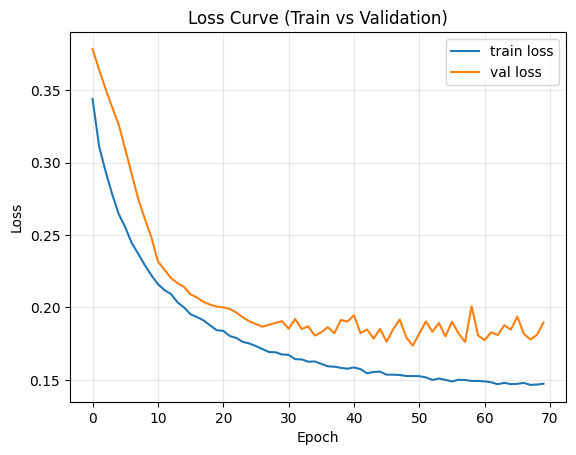

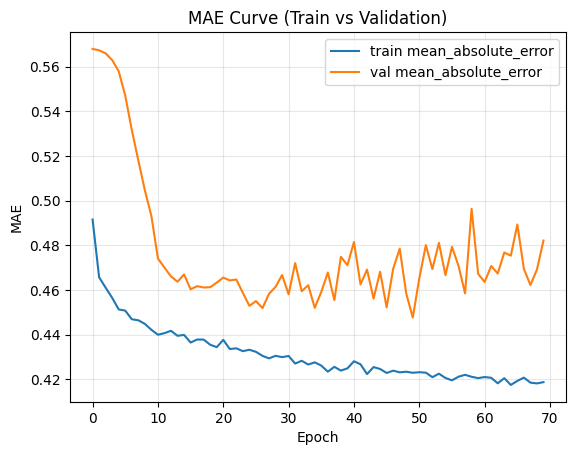

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Soybeans Test (Year=2017) | n=1008
R2: 0.120 | r: 0.488 | r^2: 0.238
RMSE: 39.414 | MAE: 30.180


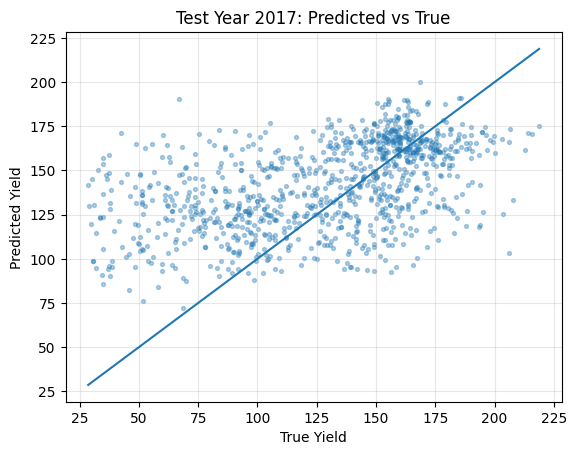

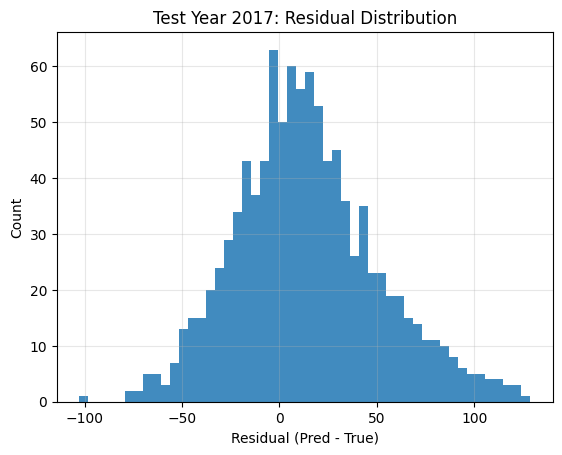

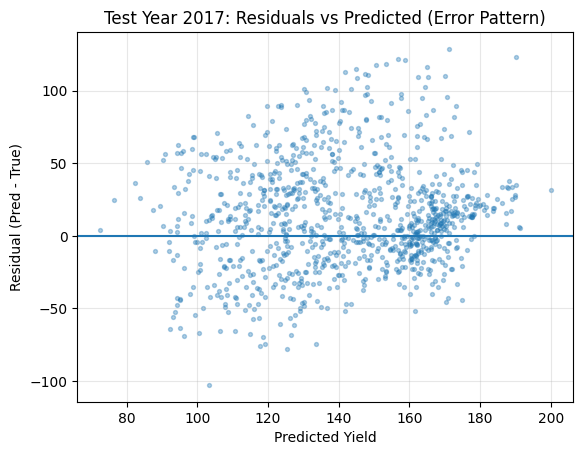

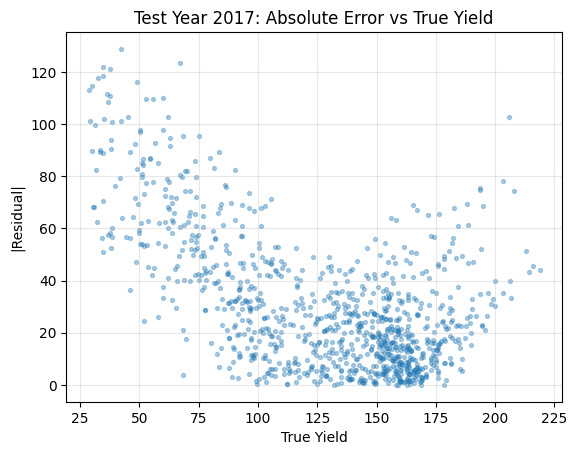

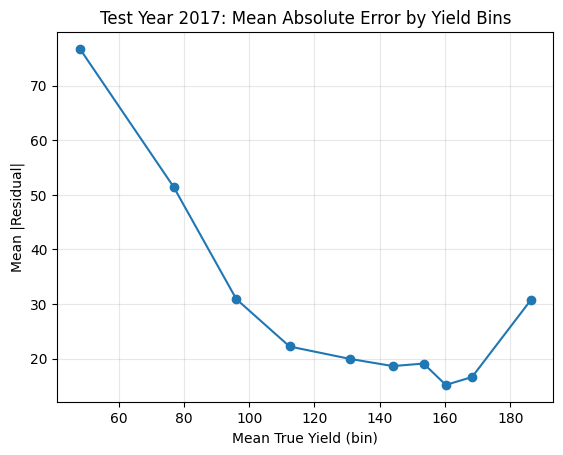

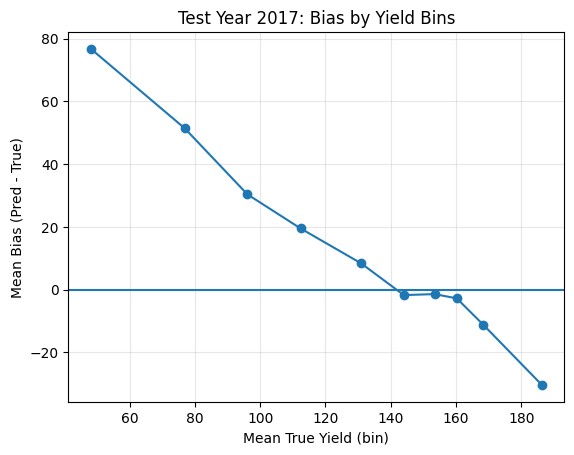

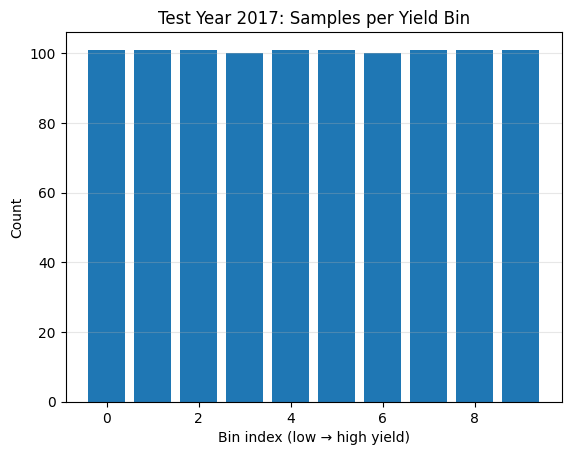

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

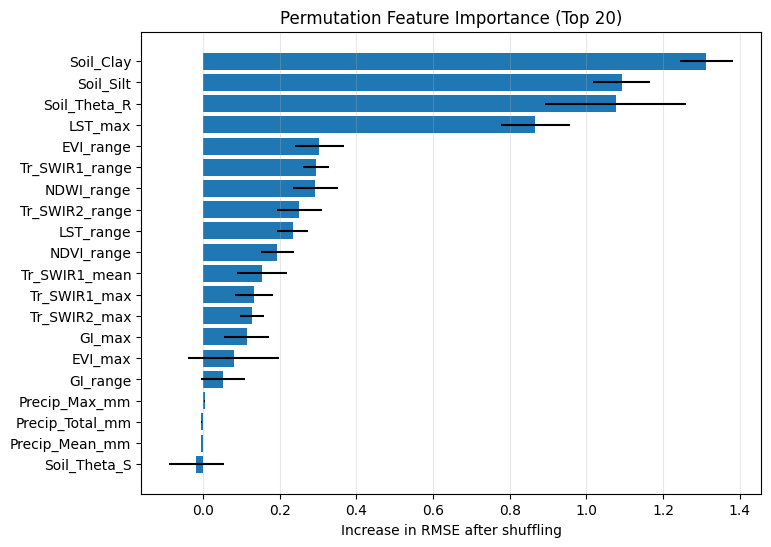


Top 15 important features (by RMSE increase):
Soil_Clay             +1.3130 ± 0.0692
Soil_Silt             +1.0915 ± 0.0743
Soil_Theta_R          +1.0766 ± 0.1839
LST_max               +0.8667 ± 0.0893
EVI_range             +0.3031 ± 0.0648
Tr_SWIR1_range        +0.2946 ± 0.0349
NDWI_range            +0.2924 ± 0.0589
Tr_SWIR2_range        +0.2510 ± 0.0595
LST_range             +0.2332 ± 0.0394
NDVI_range            +0.1939 ± 0.0437
Tr_SWIR1_mean         +0.1542 ± 0.0647
Tr_SWIR1_max          +0.1319 ± 0.0492
Tr_SWIR2_max          +0.1276 ± 0.0315
GI_max                +0.1139 ± 0.0584
EVI_max               +0.0795 ± 0.1187


In [24]:
# @title
# 1) Training curves
plot_training_curves(history)

# 2) Evaluate predictions
eval_out = eval_predictions(model, data, X_test_cnn, y_test, batch_size=2048)
print(
    f"Soybeans Test (Year={data['test_year']}) | n={len(eval_out['y_true'])}\n"
    f"R2: {eval_out['r2']:.3f} | r: {eval_out['r']:.3f} | r^2: {eval_out['r_sq']:.3f}\n"
    f"RMSE: {eval_out['rmse']:.3f} | MAE: {eval_out['mae']:.3f}"
)

# 3) Diagnostic plots
plot_prediction_diagnostics(eval_out["y_true"], eval_out["y_pred"], title_prefix=f"Test Year {data['test_year']}")

# 4) Error-by-bins curves
plot_error_by_bins(eval_out["y_true"], eval_out["y_pred"], bins=10, title_prefix=f"Test Year {data['test_year']}")

# 5) Permutation importance
importances, base_eval = permutation_importance_cnn(
    model=model,
    data=data,
    X_test_scaled_2d=data["X_test_scaled"],   # from prepare_data
    y_test_scaled=y_test,
    feature_names=data["feature_columns_used"],
    n_repeats=3,
    metric="rmse",
    batch_size=2048
)

# Optional: print top 15 importance
print("\nTop 15 important features (by RMSE increase):")
for name, mean_delta, sd_delta in importances[:15]:
    print(f"{name:20s}  +{mean_delta:.4f} ± {sd_delta:.4f}")


In [ ]:
df_soybeans.drop(columns=[], inplace=True)

Index(['x', 'y', 'yield', 'field', 'year', 'ndvi_mean', 'ndvi_max',
       'ndvi_range', 'lst_median_k', 'lst_range_k', 'lst_max_k',
       'pr_season_mm', 'pr_mean_mm_day', 'pr_max_mm_day', 'pr_range_mm_day',
       'aridity', 'theta_s', 'clay_pct', 'ksat', 'evi_mean', 'evi_max',
       'evi_range', 'gi_mean', 'gi_max', 'gi_range', 'ndwi_mean', 'ndwi_max',
       'ndwi_range', 'tr_swir1_mean', 'tr_swir1_max', 'tr_swir1_range',
       'tr_swir2_mean', 'tr_swir2_max', 'tr_swir2_range', 'elevation', 'slope',
       'aspect', 'elevation_squared', 'slope_squared', 'elev_slope',
       'elev_aspect', 'slope_aspect', 'ndvi_pr', 'aspect_southness',
       'fall_aridity', 'fall_pr_max_mm_day', 'fall_pr_mean_mm_day',
       'fall_pr_range_mm_day', 'fall_pr_season_mm', 'spring_aridity',
       'spring_pr_max_mm_day', 'spring_pr_mean_mm_day',
       'spring_pr_range_mm_day', 'spring_pr_season_mm', 'summer_aridity',
       'summer_pr_max_mm_day', 'summer_pr_mean_mm_day',
       'summer_pr_range_mm

In [53]:
df.shape

(18288, 42)

In [35]:
df.keys()

Index(['EVI_max', 'EVI_mean', 'EVI_range', 'GI_max', 'GI_mean', 'GI_range',
       'LST_max', 'LST_median', 'LST_range', 'NDVI_max', 'NDVI_mean',
       'NDVI_range', 'NDWI_max', 'NDWI_mean', 'NDWI_range', 'Precip_Max_mm',
       'Precip_Mean_mm', 'Precip_Total_mm', 'Soil_Alpha', 'Soil_BD',
       'Soil_Clay', 'Soil_Ksat', 'Soil_Lambda', 'Soil_N', 'Soil_OM',
       'Soil_Sand', 'Soil_Silt', 'Soil_Theta_R', 'Soil_Theta_S', 'Soil_pH',
       'Tr_SWIR1_max', 'Tr_SWIR1_mean', 'Tr_SWIR1_range', 'Tr_SWIR2_max',
       'Tr_SWIR2_mean', 'Tr_SWIR2_range', 'elevation', 'slope', 'aspect',
       'yield_mean', 'year', 'field'],
      dtype='object')

Predicting for Corn
Features used: 39
Train Rows: 8577 | Val Rows ([2014, 2024, 2023]): 2238 | Test Rows (2017): 1008

Starting Training...
Epoch 1/500
135/135 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - loss: 0.5777 - mae: 0.8806 - val_loss: 0.2616 - val_mae: 0.5285 - learning_rate: 0.0010
Epoch 2/500
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2201 - mae: 0.4706 - val_loss: 0.2294 - val_mae: 0.4839 - learning_rate: 0.0010
Epoch 3/500
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2055 - mae: 0.4550 - val_loss: 0.1873 - val_mae: 0.4209 - learning_rate: 0.0010
Epoch 4/500
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2035 - mae: 0.4546 - val_loss: 0.1965 - val_mae: 0.4475 - learning_rate: 0.0010
Epoch 5/500
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1853 - mae: 0.4256 - val_loss: 0.2049 - val_mae: 0.4551 - learning_rate: 0.0010
Epoch 6/500
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1695 - mae: 0.4005 - val_loss: 0.2518 - val_mae: 0.5277 - learning_rate: 0.0010


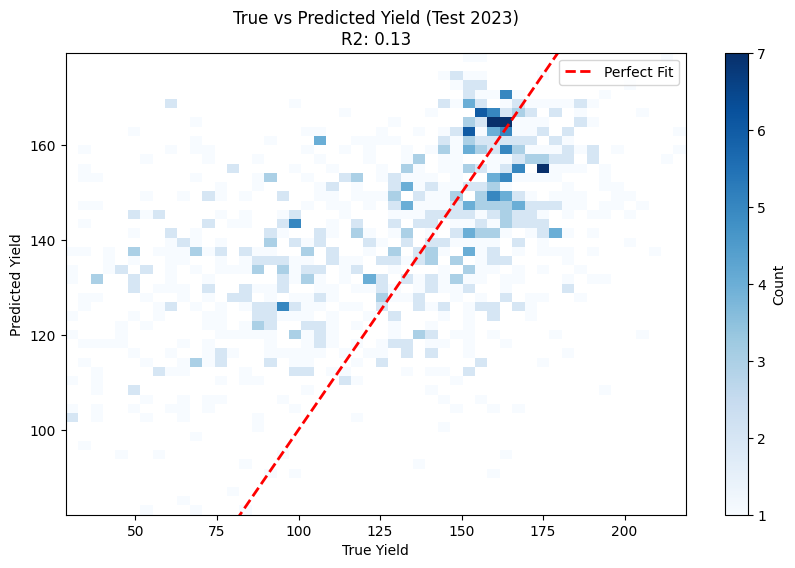

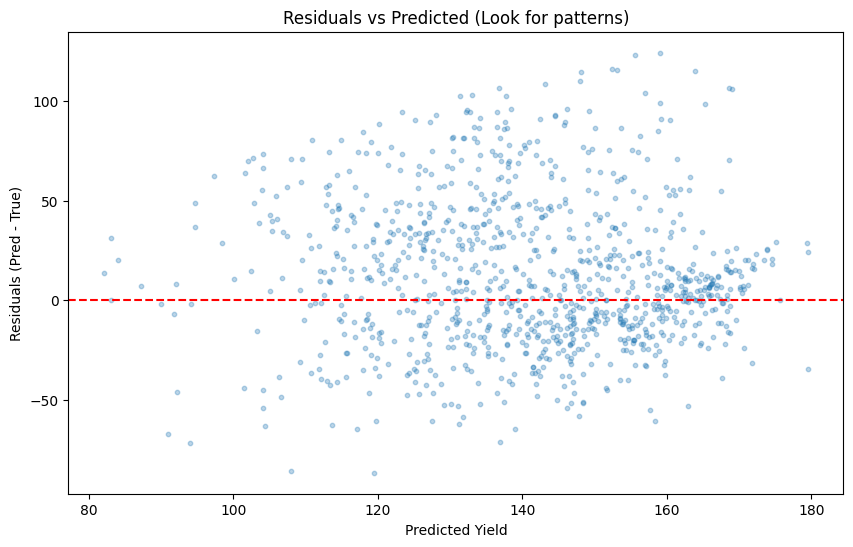

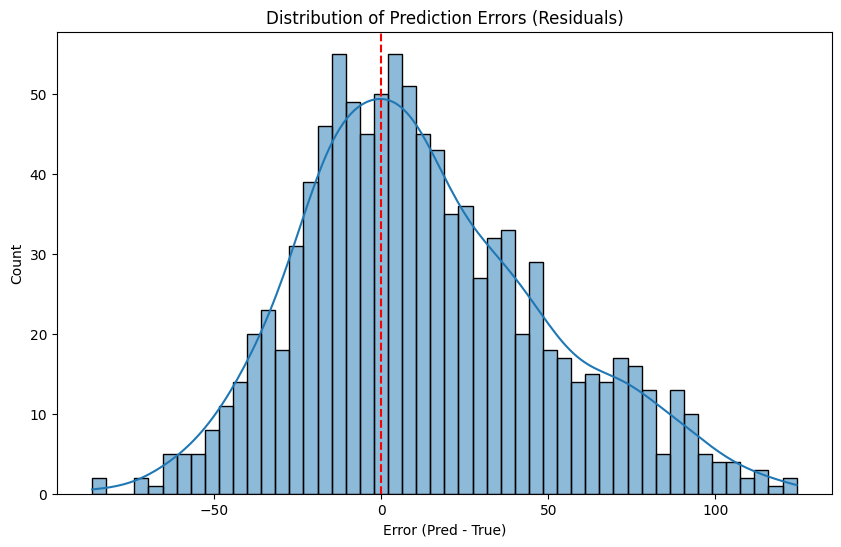

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
from sklearn.preprocessing import RobustScaler, QuantileTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

print("Predicting for Corn")

# ==========================================
# 1. Configuration & Data Loading
# ==========================================
# FILE PATH
# soy_fn = r"/content/drive/MyDrive/Colab Notebooks/Data For Yield Prediction/Data/df_soybeans_absolute_all_years_with_divided_precipitation.parquet"

# LOGICAL FEATURE GROUPING (Crucial for Conv1D)
# We group features so the sliding window sees related data.
# feature_groups = {
#     'vegetation': ['ndvi_mean', 'ndvi_max', 'ndvi_range', 'evi_mean', 'evi_max', 'evi_range',
#                    'gi_mean', 'gi_max', 'gi_range', 'ndvi_pr'],
#     'water_stress': ['ndwi_mean', 'ndwi_max', 'ndwi_range', 'aridity',
#                      'fall_aridity', 'spring_aridity', 'summer_aridity'],
#     'temperature': ['lst_median_k', 'lst_range_k', 'lst_max_k'],
#     'precip': ['pr_season_mm', 'pr_max_mm_day', 'pr_mean_mm_day', 'pr_range_mm_day',
#                'fall_pr_season_mm', 'spring_pr_season_mm', 'summer_pr_season_mm'],
#     'swir': ['tr_swir1_mean', 'tr_swir1_max', 'tr_swir1_range',
#              'tr_swir2_mean', 'tr_swir2_max', 'tr_swir2_range'],
#     'soil_topo': ['theta_s', 'clay_pct', 'ksat', 'elevation', 'slope', 'aspect',
#                   'elevation_squared', 'slope_squared', 'elev_slope']
# }
feature_groups = {
    'vegetation': ['EVI_max', 'EVI_mean', 'EVI_range', 'GI_max', 'GI_mean', 'GI_range',
       'NDVI_max', 'NDVI_mean',
       'NDVI_range', 'NDWI_max', 'NDWI_mean', 'NDWI_range'],
    # 'water_stress': ['ndwi_mean', 'ndwi_max', 'ndwi_range', 'aridity',
    #                  'fall_aridity', 'spring_aridity', 'summer_aridity'],
    'temperature': ['LST_max', 'LST_median', 'LST_range',],
    'precip': [ 'Precip_Max_mm',
       'Precip_Mean_mm', 'Precip_Total_mm',],
    'swir': ['Tr_SWIR1_max', 'Tr_SWIR1_mean', 'Tr_SWIR1_range', 'Tr_SWIR2_max',
       'Tr_SWIR2_mean', 'Tr_SWIR2_range',],
    'soil_topo': ['elevation', 'slope', 'aspect', 'Soil_Alpha', 'Soil_BD',
       'Soil_Clay', 'Soil_Ksat', 'Soil_Lambda', 'Soil_N', 'Soil_OM',
       'Soil_Sand', 'Soil_Silt', 'Soil_Theta_R', 'Soil_Theta_S', 'Soil_pH']
}

# Flatten groups into a single ordered list
ORDERED_FEATURES = [f for group in feature_groups.values() for f in group]

# def load_and_clean_data(path):
#     df = pd.read_parquet(path)
#     # Remove extreme outliers (physics-informed filtering)
#     df = df[df['yield'] > 0] # Yield cannot be 0 or negative generally
#     df = df[df['gi_max'] < df['gi_max'].quantile(0.99)]

#     # Cap yield at 99th percentile to remove measurement errors
#     y_cap = df['yield'].quantile(0.99)
#     df = df[df['yield'] <= y_cap]

#     return df

# ==========================================
# 2. Preprocessing Strategy
# ==========================================
def prepare_splits(df, test_year=2023, val_year=[2022], features=ORDERED_FEATURES):
    """
    Splits data into Train (Older years), Val (Recent year), Test (Target year).
    Using distinct years for Val and Test prevents overfitting to specific year conditions.
    """
    # Filter only existing features
    valid_features = [f for f in features if f in df.columns]
    print(f"Features used: {len(valid_features)}")

    # Split
    test_df = df[df['year'] == test_year].copy()
    val_df = df[df['year'].isin(val_year)].copy()
    train_df = df[(df['year'] != test_year) & ~(df['year'].isin(val_year))].copy()

    print(f"Train Rows: {len(train_df)} | Val Rows ({val_year}): {len(val_df)} | Test Rows ({test_year}): {len(test_df)}")

    # Fill NA with Train Means
    train_means = train_df[valid_features].mean()
    train_df[valid_features] = train_df[valid_features].fillna(train_means)
    val_df[valid_features] = val_df[valid_features].fillna(train_means)
    test_df[valid_features] = test_df[valid_features].fillna(train_means)

    # Scaling (QuantileTransformer is often better for skewed RS data than RobustScaler)
    scaler_x = QuantileTransformer(output_distribution='normal', random_state=42)
    # scaler_x = RobustScaler() # Fallback if Quantile is too slow

    X_train = scaler_x.fit_transform(train_df[valid_features])
    X_val = scaler_x.transform(val_df[valid_features])
    X_test = scaler_x.transform(test_df[valid_features])

    # Target Scaling
    # We use RobustScaler for Y to handle outliers but keep the linear scale roughly
    scaler_y = RobustScaler()
    y_train = scaler_y.fit_transform(train_df[['yield_mean']]).flatten()
    y_val = scaler_y.transform(val_df[['yield_mean']]).flatten()
    y_test = scaler_y.transform(test_df[['yield_mean']]).flatten()

    # Reshape for CNN (Samples, Features, 1)
    X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
    X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    return {
        'X_train': X_train_cnn, 'y_train': y_train,
        'X_val': X_val_cnn, 'y_val': y_val,
        'X_test': X_test_cnn, 'y_test': y_test,
        'scaler_y': scaler_y,
        'feature_names': valid_features
    }

# ==========================================
# 3. Model: Residual 1D CNN
# ==========================================
def build_resnet_cnn(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Initial projection
    x = layers.Conv1D(64, kernel_size=1, padding='same', activation='linear')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)

    # Residual Block 1
    shortcut = x
    x = layers.Conv1D(64, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Conv1D(64, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.Add()([x, shortcut]) # Skip connection
    x = layers.Activation('gelu')(x)

    # Residual Block 2
    shortcut = x
    x = layers.Conv1D(128, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('gelu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Conv1D(128, kernel_size=3, padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    # 1x1 conv on shortcut to match dimensions
    shortcut = layers.Conv1D(128, kernel_size=1, padding='same')(shortcut)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('gelu')(x)

    # Global Pooling (Spatial Pyramid idea or just Global Average)
    avg_pool = layers.GlobalAveragePooling1D()(x)
    max_pool = layers.GlobalMaxPooling1D()(x)
    x = layers.Concatenate()([avg_pool, max_pool])

    # Dense Head
    x = layers.Dense(128, activation='gelu', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1)(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# ==========================================
# 4. Execution Pipeline
# ==========================================

# A. Load & Prep
# df = load_and_clean_data(soy_fn)
data = prepare_splits(df, test_year=2017, val_year=[2014,2024, 2023])

# B. Build & Train
tf.keras.backend.clear_session()
model = build_resnet_cnn(input_shape=(data['X_train'].shape[1], 1))

optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)
model.compile(loss='huber', optimizer=optimizer, metrics=['mae'])

# Callbacks
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

print("\nStarting Training...")
history = model.fit(
    data['X_train'], data['y_train'],
    validation_data=(data['X_val'], data['y_val']),
    epochs=500, # Increased epochs since we have EarlyStopping
    batch_size=64, # Larger batch size usually stable for tabular
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ==========================================
# 5. Advanced Evaluation
# ==========================================
def evaluate_model(model, data):
    # Predict
    y_pred_scaled = model.predict(data['X_test'], batch_size=2048).flatten()

    # Inverse Scale
    y_true = data['scaler_y'].inverse_transform(data['y_test'].reshape(-1, 1)).flatten()
    y_pred = data['scaler_y'].inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

    # Metrics
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    bias = np.mean(y_pred - y_true)
    corr = np.corrcoef(y_true, y_pred)[0, 1]


    print("\n" + "="*40)
    print(f"FINAL TEST RESULTS (Year 2017) for Corn")
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE:     {rmse:.4f}")
    print(f"MAE:      {mae:.4f}")
    print(f"Bias:     {bias:.4f}")
    print(f"Corr_sq:     {corr**2:.4f}")
    print("="*40)

    return y_true, y_pred

y_true, y_pred = evaluate_model(model, data)

# ==========================================
# 6. Visualization
# ==========================================

# Plot 1: True vs Predicted with Density
plt.figure(figsize=(10, 6))
plt.hist2d(y_true, y_pred, bins=50, cmap='Blues', cmin=1)
plt.colorbar(label='Count')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Perfect Fit')
plt.xlabel('True Yield')
plt.ylabel('Predicted Yield')
plt.title(f'True vs Predicted Yield (Test 2023)\nR2: {r2_score(y_true, y_pred):.2f}')
plt.legend()
plt.show()

# Plot 2: Residuals vs Predicted (Homoscedasticity Check)
residuals = y_pred - y_true
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3, s=10)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals (Pred - True)')
plt.title('Residuals vs Predicted (Look for patterns)')
plt.show()

# Plot 3: Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Error (Pred - True)')
plt.show()

# Pytorch Model

###importing necessary libraries


In [26]:
import numpy as np
import pandas as pd
import math
import random
from dataclasses import dataclass
from typing import Dict, List, Tuple, Optional

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ParameterSampler

import matplotlib.pyplot as plt

In [43]:
Dataset.__doc__

'An abstract class representing a :class:`Dataset`.\n\n    All datasets that represent a map from keys to data samples should subclass\n    it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a\n    data sample for a given key. Subclasses could also optionally overwrite\n    :meth:`__len__`, which is expected to return the size of the dataset by many\n    :class:`~torch.utils.data.Sampler` implementations and the default options\n    of :class:`~torch.utils.data.DataLoader`. Subclasses could also\n    optionally implement :meth:`__getitems__`, for speedup batched samples\n    loading. This method accepts list of indices of samples of batch and returns\n    list of samples.\n\n    .. note::\n      :class:`~torch.utils.data.DataLoader` by default constructs an index\n      sampler that yields integral indices.  To make it work with a map-style\n      dataset with non-integral indices/keys, a custom sampler must be provided.\n    '

In [27]:
# ---------------------------
# Reproducibility
# ---------------------------
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


### defining the split

In [28]:
# ---------------------------
# Year-based split (NO leakage)
# ---------------------------
VAL_YEARS  = {2014, 2023, 2024}
TEST_YEARS = {2017}

In [29]:
def split_by_year(df: pd.DataFrame):
    train_df = df[~df["year"].isin(VAL_YEARS.union(TEST_YEARS))].copy()
    val_df   = df[df["year"].isin(VAL_YEARS)].copy()
    test_df  = df[df["year"].isin(TEST_YEARS)].copy()

    print("Train years:", sorted(train_df["year"].unique()))
    print("Val years:", sorted(val_df["year"].unique()))
    print("Test years:", sorted(test_df["year"].unique()))
    print("Shapes:", train_df.shape, val_df.shape, test_df.shape)
    return train_df, val_df, test_df


In [30]:
def get_feature_order(cols: List[str]) -> List[str]:
    # Domain groups (you can tweak this later)
    veg = ["NDVI_mean","NDVI_max","NDVI_range",
           "EVI_mean","EVI_max","EVI_range",
           "GI_mean","GI_max","GI_range",
           "NDWI_mean","NDWI_max","NDWI_range"]

    thermal = ["LST_median","LST_max","LST_range"]

    precip = ["Precip_Mean_mm","Precip_Max_mm","Precip_Total_mm"]

    soil = ["Soil_pH","Soil_OM","Soil_BD","Soil_Clay","Soil_Sand","Soil_Silt",
            "Soil_Alpha","Soil_Ksat","Soil_Lambda","Soil_N","Soil_Theta_R","Soil_Theta_S"]

    swir = ["Tr_SWIR1_mean","Tr_SWIR1_max","Tr_SWIR1_range",
            "Tr_SWIR2_mean","Tr_SWIR2_max","Tr_SWIR2_range"]

    topo = ["elevation","slope","aspect"]

    ordered = veg + thermal + precip + soil + swir + topo

    # Keep only those that exist (safety)
    ordered = [c for c in ordered if c in cols]

    # If any numeric feature wasn't listed above, append at end (so nothing is dropped)
    leftovers = [c for c in cols if c not in ordered]
    ordered += leftovers

    return ordered


In [31]:
TARGET_COL = "yield_mean"
META_COLS = ["year", "field"]  # kept for split + tracking; not used as numeric inputs

# This assumes your DataFrame is already loaded as df in Colab.
# df shape: (18288, 42)
train_df, val_df, test_df = split_by_year(df)

feature_cols = [c for c in df.columns if c not in ([TARGET_COL] + META_COLS)]
feature_cols = get_feature_order(feature_cols)

print("Num features:", len(feature_cols))
print("First 10 ordered features:", feature_cols[:10])


Train years: [np.int64(2015), np.int64(2016), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Val years: [np.int64(2014), np.int64(2023), np.int64(2024)]
Test years: [np.int64(2017)]
Shapes: (8577, 42) (2238, 42) (1008, 42)
Num features: 39
First 10 ordered features: ['NDVI_mean', 'NDVI_max', 'NDVI_range', 'EVI_mean', 'EVI_max', 'EVI_range', 'GI_mean', 'GI_max', 'GI_range', 'NDWI_mean']


### Preprocess


In [32]:
def y_transform(y: np.ndarray) -> np.ndarray:
    # log1p handles zeros safely
    return np.log1p(y)

def y_inverse(y_log: np.ndarray) -> np.ndarray:
    return np.expm1(y_log)

In [33]:

# ---------------------------
# Standardize X (fit on train only to avoid leakage)
# ---------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(train_df[feature_cols].values.astype(np.float32))
X_val   = scaler.transform(val_df[feature_cols].values.astype(np.float32))
X_test  = scaler.transform(test_df[feature_cols].values.astype(np.float32))

y_train = y_transform(train_df[TARGET_COL].values.astype(np.float32))
y_val   = y_transform(val_df[TARGET_COL].values.astype(np.float32))
y_test  = y_transform(test_df[TARGET_COL].values.astype(np.float32))

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)


X_train shape: (8577, 39) y_train shape: (8577,)


In [34]:
# ---------------------------
# PyTorch Dataset
# For 1D CNN we want shape: (channels=1, seq_len=num_features)
# ---------------------------
class TabularSeqDataset(Dataset):
    def __init__(self, X: np.ndarray, y: np.ndarray):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        x = self.X[idx].unsqueeze(0)  # (1, num_features)
        y = self.y[idx]
        return x, y

def make_loaders(X_train, y_train, X_val, y_val, batch_size=256):
    train_ds = TabularSeqDataset(X_train, y_train)
    val_ds   = TabularSeqDataset(X_val, y_val)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
    val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
    return train_loader, val_loader


### Models:

In [35]:
# ---------------------------
# Losses
# ---------------------------
class QuantileLoss(nn.Module):
    """
    Pinball loss for quantile regression.
    If you want uncertainty later, you can train separate models for q=0.1, 0.5, 0.9.
    """
    def __init__(self, q: float):
        super().__init__()
        self.q = q

    def forward(self, y_pred, y_true):
        e = y_true - y_pred
        return torch.mean(torch.maximum(self.q * e, (self.q - 1) * e))

def get_loss(loss_name: str, quantile: float = 0.5):
    if loss_name == "huber":
        return nn.SmoothL1Loss()  # Huber-like
    if loss_name == "mse":
        return nn.MSELoss()
    if loss_name == "quantile":
        return QuantileLoss(quantile)
    raise ValueError("Unknown loss_name")

In [36]:
# ---------------------------
# 1D CNN for tabular (sequence length = num_features)
# ---------------------------
class TabularCNN1D(nn.Module):
    def __init__(
        self,
        num_features: int,
        channels: List[int] = [32, 64, 128],
        kernel_size: int = 3,
        dropout: float = 0.2,
        fc_units: int = 128
    ):
        super().__init__()

        layers = []
        in_ch = 1
        seq_len = num_features

        # Conv blocks
        for out_ch in channels:
            layers += [
                nn.Conv1d(in_ch, out_ch, kernel_size=kernel_size, padding=kernel_size // 2),
                nn.BatchNorm1d(out_ch),
                nn.GELU(),
                nn.Dropout(dropout),
            ]
            in_ch = out_ch

        self.conv = nn.Sequential(*layers)

        # Global pooling makes it robust to sequence length and reduces params
        self.pool = nn.AdaptiveAvgPool1d(1)  # -> (B, C, 1)

        self.head = nn.Sequential(
            nn.Flatten(),                    # (B, C)
            nn.Linear(in_ch, fc_units),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(fc_units, 1)           # regression
        )

    def forward(self, x):
        # x: (B, 1, num_features)
        x = self.conv(x)
        x = self.pool(x)
        x = self.head(x)
        return x.squeeze(1)  # (B,)

In [37]:

@dataclass
class TrainConfig:
    batch_size: int = 256
    epochs: int = 200
    lr: float = 1e-3
    weight_decay: float = 1e-4
    patience: int = 20               # early stopping patience
    plateau_patience: int = 8        # ReduceLROnPlateau patience
    lr_factor: float = 0.5
    min_lr: float = 1e-6

    # "Jump" reset heuristic:
    # If we stagnate longer than jump_patience, reset LR to 0.9 * initial_lr
    jump_patience: int = 18
    jump_multiplier: float = 0.9


In [38]:
def evaluate_model(model, loader, loss_fn):
    model.eval()
    losses = []
    preds = []
    trues = []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            yb = yb.to(device)
            yhat = model(xb)
            loss = loss_fn(yhat, yb)
            losses.append(loss.item())
            preds.append(yhat.detach().cpu().numpy())
            trues.append(yb.detach().cpu().numpy())

    preds = np.concatenate(preds)
    trues = np.concatenate(trues)

    # Metrics in log-space (training objective)
    mse = mean_squared_error(trues, preds)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)

    return float(np.mean(losses)), {"rmse_log": rmse, "mae_log": mae, "r2_log": r2}, preds, trues


In [39]:



class EarlyStopper:
    def __init__(self, patience: int = 20, min_delta: float = 0.0):
        self.patience = patience
        self.min_delta = min_delta
        self.best = float("inf")
        self.bad_epochs = 0

    def step(self, val_loss: float) -> bool:
        if val_loss < self.best - self.min_delta:
            self.best = val_loss
            self.bad_epochs = 0
            return False
        self.bad_epochs += 1
        return self.bad_epochs >= self.patience


In [40]:

def train_one_run(
    X_train, y_train, X_val, y_val,
    model_params: Dict,
    cfg: TrainConfig,
    loss_name: str = "huber",
    quantile: float = 0.5
):
    train_loader, val_loader = make_loaders(X_train, y_train, X_val, y_val, batch_size=cfg.batch_size)

    model = TabularCNN1D(num_features=X_train.shape[1], **model_params).to(device)
    loss_fn = get_loss(loss_name, quantile=quantile)

    optimizer = torch.optim.AdamW(model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="min", factor=cfg.lr_factor, patience=cfg.plateau_patience, min_lr=cfg.min_lr
    )

    early = EarlyStopper(patience=cfg.patience)

    history = {
        "train_loss": [],
        "val_loss": [],
        "val_rmse_log": [],
        "val_r2_log": [],
        "lr": []
    }

    best_state = None
    best_val = float("inf")

    # For LR "jump reset" heuristic
    no_improve_epochs = 0
    initial_lr = cfg.lr

    for epoch in range(cfg.epochs):
        model.train()
        batch_losses = []
        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)

            optimizer.zero_grad()
            yhat = model(xb)
            loss = loss_fn(yhat, yb)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # stabilizes training
            optimizer.step()
            batch_losses.append(loss.item())

        train_loss = float(np.mean(batch_losses))
        val_loss, val_metrics, _, _ = evaluate_model(model, val_loader, loss_fn)

        scheduler.step(val_loss)

        current_lr = optimizer.param_groups[0]["lr"]
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["val_rmse_log"].append(val_metrics["rmse_log"])
        history["val_r2_log"].append(val_metrics["r2_log"])
        history["lr"].append(current_lr)

        # Track best + save state
        if val_loss < best_val:
            best_val = val_loss
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1

        # LR jump reset (your “reset to 0.9 of the last starting rate” idea)
        # Here: if we haven't improved for jump_patience epochs, reset LR to 0.9 * initial_lr.
        if no_improve_epochs >= cfg.jump_patience:
            new_lr = max(cfg.min_lr, cfg.jump_multiplier * initial_lr)
            for pg in optimizer.param_groups:
                pg["lr"] = new_lr
            no_improve_epochs = 0  # reset stagnation counter

        # Early stopping
        if early.step(val_loss):
            break

    # Restore best weights
    if best_state is not None:
        model.load_state_dict(best_state)

    return model, history, best_val

In [41]:
# ---------------------------
# Hyperparameter search space
# ---------------------------
param_space = {
    "channels": [
        [32, 64],
        [32, 64, 128],
        [64, 128, 128]
    ],
    "kernel_size": [3, 5, 7],
    "dropout": [0.0, 0.1, 0.2, 0.3, 0.4],
    "fc_units": [64, 128, 256]
}

train_space = {
    "lr": [3e-4, 1e-3, 2e-3],
    "weight_decay": [0.0, 1e-5, 1e-4, 5e-4, 1e-3],
    "batch_size": [128, 256, 512],
    "loss_name": ["huber", "mse"],     # add quantile later for uncertainty variants
}

N_TRIALS = 150  # increase to 50-150 for stronger tuning if you have time

samples = list(ParameterSampler({**param_space, **train_space}, n_iter=N_TRIALS, random_state=42))

best = {"val_loss": float("inf"), "model": None, "history": None, "params": None}


In [42]:
for i, s in enumerate(samples, 1):
    model_params = {
        "channels": s["channels"],
        "kernel_size": s["kernel_size"],
        "dropout": s["dropout"],
        "fc_units": s["fc_units"]
    }
    cfg = TrainConfig(
        batch_size=s["batch_size"],
        lr=s["lr"],
        weight_decay=s["weight_decay"],
        epochs=200
    )
    loss_name = s["loss_name"]

    model, hist, val_loss = train_one_run(
        X_train, y_train, X_val, y_val,
        model_params=model_params,
        cfg=cfg,
        loss_name=loss_name
    )

    print(f"[{i}/{N_TRIALS}] val_loss={val_loss:.5f} params={s}")

    if val_loss < best["val_loss"]:
        best.update({"val_loss": val_loss, "model": model, "history": hist, "params": s})

print("\nBEST val_loss:", best["val_loss"])
print("BEST params:", best["params"])
best_model = best["model"]
best_history = best["history"]


[1/150] val_loss=0.07317 params={'weight_decay': 0.001, 'lr': 0.001, 'loss_name': 'huber', 'kernel_size': 5, 'fc_units': 256, 'dropout': 0.3, 'channels': [32, 64], 'batch_size': 512}
[2/150] val_loss=0.11834 params={'weight_decay': 0.0, 'lr': 0.002, 'loss_name': 'mse', 'kernel_size': 3, 'fc_units': 256, 'dropout': 0.1, 'channels': [32, 64], 'batch_size': 256}
[3/150] val_loss=0.06520 params={'weight_decay': 0.001, 'lr': 0.0003, 'loss_name': 'huber', 'kernel_size': 5, 'fc_units': 128, 'dropout': 0.1, 'channels': [32, 64, 128], 'batch_size': 128}
[4/150] val_loss=0.07777 params={'weight_decay': 0.0001, 'lr': 0.001, 'loss_name': 'huber', 'kernel_size': 5, 'fc_units': 64, 'dropout': 0.3, 'channels': [32, 64, 128], 'batch_size': 256}
[5/150] val_loss=0.08577 params={'weight_decay': 0.0001, 'lr': 0.0003, 'loss_name': 'huber', 'kernel_size': 5, 'fc_units': 64, 'dropout': 0.4, 'channels': [64, 128, 128], 'batch_size': 256}
[6/150] val_loss=0.06523 params={'weight_decay': 0.0, 'lr': 0.002, 'los

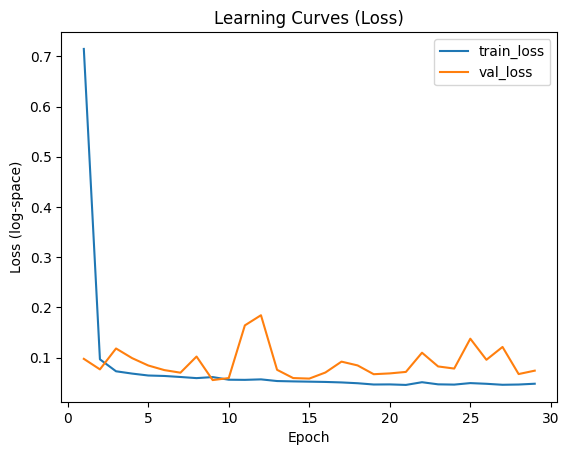

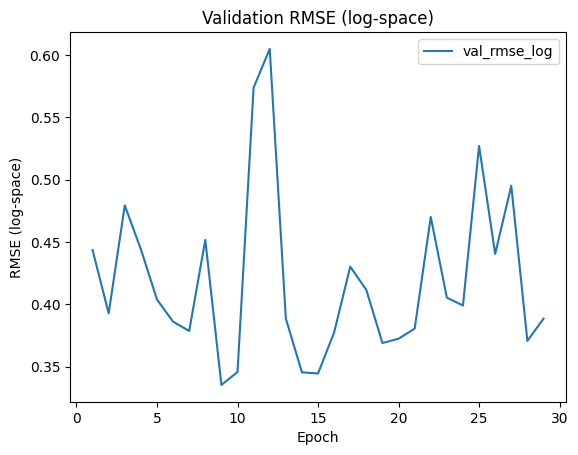

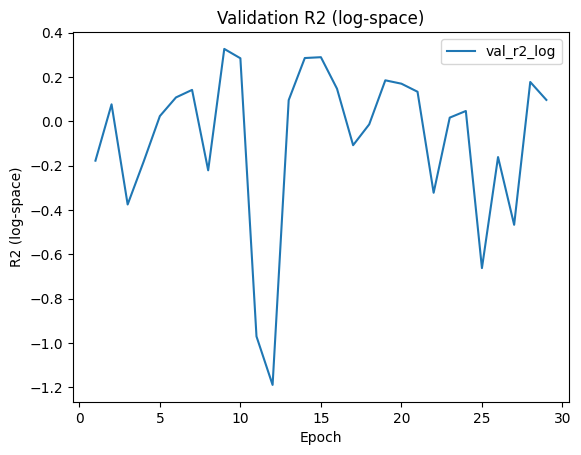

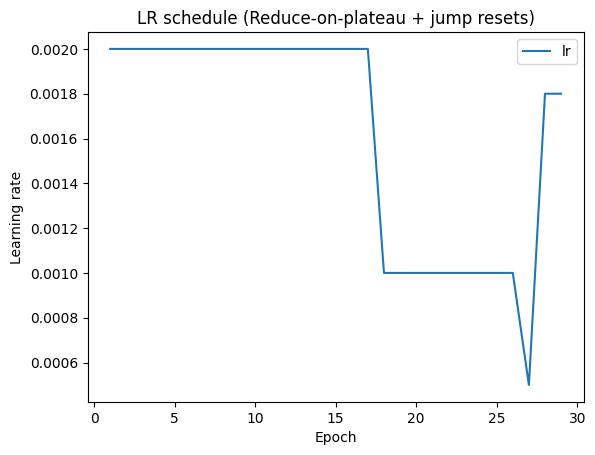

In [44]:
def plot_learning(history):
    epochs = range(1, len(history["train_loss"]) + 1)

    plt.figure()
    plt.plot(epochs, history["train_loss"], label="train_loss")
    plt.plot(epochs, history["val_loss"], label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss (log-space)")
    plt.legend()
    plt.title("Learning Curves (Loss)")
    plt.show()

    plt.figure()
    plt.plot(epochs, history["val_rmse_log"], label="val_rmse_log")
    plt.xlabel("Epoch")
    plt.ylabel("RMSE (log-space)")
    plt.legend()
    plt.title("Validation RMSE (log-space)")
    plt.show()

    plt.figure()
    plt.plot(epochs, history["val_r2_log"], label="val_r2_log")
    plt.xlabel("Epoch")
    plt.ylabel("R2 (log-space)")
    plt.legend()
    plt.title("Validation R2 (log-space)")
    plt.show()

    plt.figure()
    plt.plot(epochs, history["lr"], label="lr")
    plt.xlabel("Epoch")
    plt.ylabel("Learning rate")
    plt.legend()
    plt.title("LR schedule (Reduce-on-plateau + jump resets)")
    plt.show()

plot_learning(best_history)


TEST (2023) metrics (yield space):
RMSE: 42.30300738238063
MAE : 32.06709289550781
R2  : -0.013831377029418945
Corr^2: 0.1633584248521633


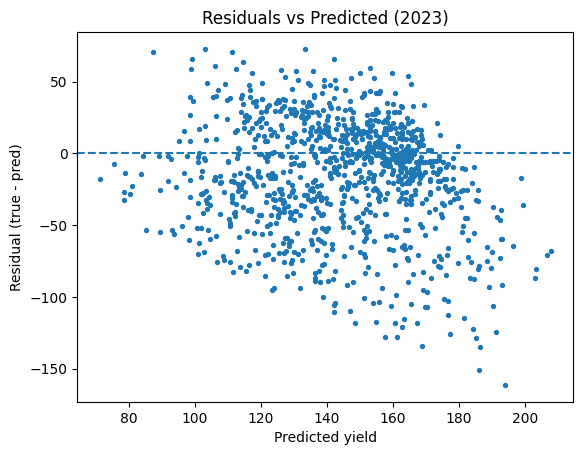

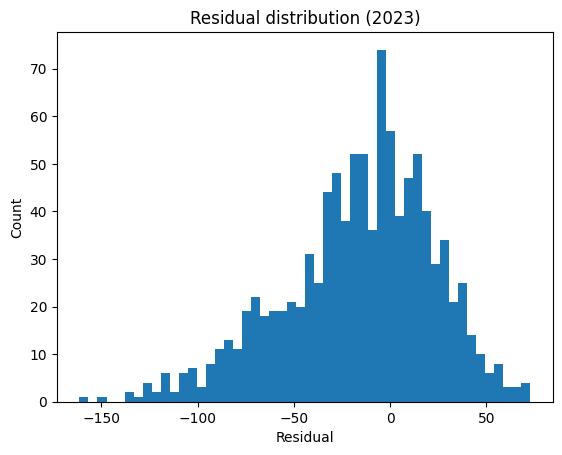

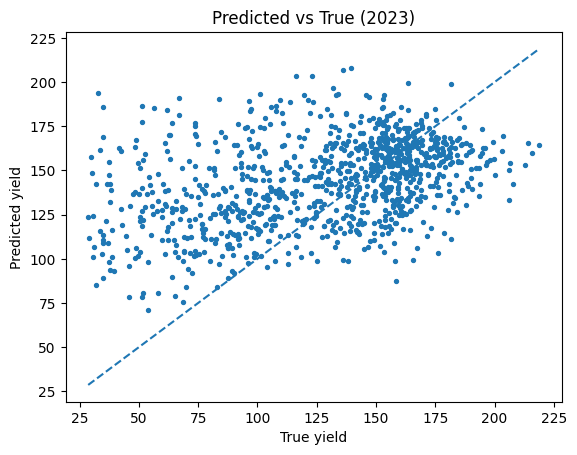

In [45]:
# Build loaders for evaluation
test_loader = DataLoader(TabularSeqDataset(X_test, y_test), batch_size=512, shuffle=False)

# Use Huber for evaluation if that was best; otherwise match best.
loss_name = best["params"]["loss_name"]
loss_fn = get_loss(loss_name)

test_loss, test_metrics_log, yhat_log, ytrue_log = evaluate_model(best_model, test_loader, loss_fn)

# Convert back to yield space for human interpretable metrics
yhat = y_inverse(yhat_log)
ytrue = y_inverse(ytrue_log)

rmse = math.sqrt(mean_squared_error(ytrue, yhat))
mae  = mean_absolute_error(ytrue, yhat)
r2   = r2_score(ytrue, yhat)
corr_sq = np.corrcoef(ytrue, yhat)[0, 1] ** 2

print("TEST (2023) metrics (yield space):")
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)
print("Corr^2:", corr_sq)
# Residuals
resid = ytrue - yhat

plt.figure()
plt.scatter(yhat, resid, s=8)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted yield")
plt.ylabel("Residual (true - pred)")
plt.title("Residuals vs Predicted (2023)")
plt.show()

plt.figure()
plt.hist(resid, bins=50)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Residual distribution (2023)")
plt.show()

plt.figure()
plt.scatter(ytrue, yhat, s=8)
mn = min(ytrue.min(), yhat.min())
mx = max(ytrue.max(), yhat.max())
plt.plot([mn, mx], [mn, mx], linestyle="--")
plt.xlabel("True yield")
plt.ylabel("Predicted yield")
plt.title("Predicted vs True (2023)")
plt.show()


Base RMSE: 42.30300738238063
            feature  rmse_increase
0         NDVI_mean       2.472947
2        NDVI_range       1.846587
7            GI_max       1.776576
4           EVI_max       1.497181
23        Soil_Silt       1.488187
13          LST_max       1.076618
28     Soil_Theta_R       0.953162
8          GI_range       0.945861
3          EVI_mean       0.926920
18          Soil_pH       0.651595
24       Soil_Alpha       0.638053
6           GI_mean       0.556882
5         EVI_range       0.527497
31     Tr_SWIR1_max       0.425099
26      Soil_Lambda       0.394520
11       NDWI_range       0.323679
22        Soil_Sand       0.273585
9         NDWI_mean       0.142041
35   Tr_SWIR2_range       0.090968
21        Soil_Clay       0.090759
16    Precip_Max_mm       0.008979
17  Precip_Total_mm      -0.006532
15   Precip_Mean_mm      -0.013225
1          NDVI_max      -0.131897
38           aspect      -0.145771
25        Soil_Ksat      -0.177677
32   Tr_SWIR1_range      -

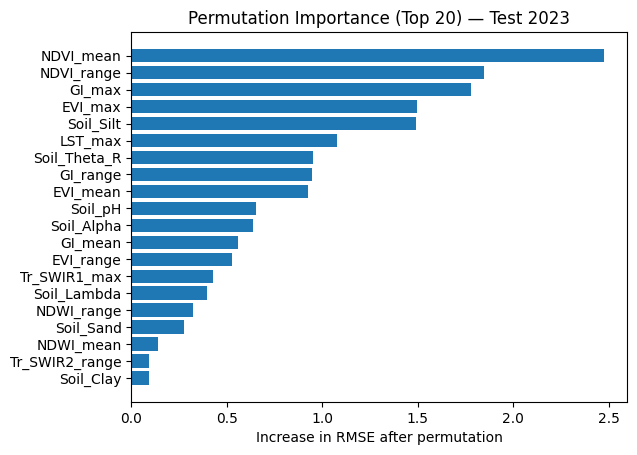

In [46]:
def predict_yield_space(model, X_np: np.ndarray, batch_size: int = 512) -> np.ndarray:
    model.eval()
    ds = TabularSeqDataset(X_np, np.zeros((X_np.shape[0],), dtype=np.float32))
    loader = DataLoader(ds, batch_size=batch_size, shuffle=False)
    preds_log = []
    with torch.no_grad():
        for xb, _ in loader:
            xb = xb.to(device)
            yhat_log = model(xb).detach().cpu().numpy()
            preds_log.append(yhat_log)
    preds_log = np.concatenate(preds_log)
    return y_inverse(preds_log)

base_pred = predict_yield_space(best_model, X_test)
base_rmse = math.sqrt(mean_squared_error(ytrue, base_pred))
print("Base RMSE:", base_rmse)

rng = np.random.RandomState(42)
importances = []

for j, feat in enumerate(feature_cols):
    Xp = X_test.copy()
    rng.shuffle(Xp[:, j])  # permute one feature column
    pred_p = predict_yield_space(best_model, Xp)
    rmse_p = math.sqrt(mean_squared_error(ytrue, pred_p))
    importances.append((feat, rmse_p - base_rmse))

imp_df = pd.DataFrame(importances, columns=["feature", "rmse_increase"]).sort_values("rmse_increase", ascending=False)
print(imp_df.head(50))

plt.figure()
top = imp_df.head(20).iloc[::-1]
plt.barh(top["feature"], top["rmse_increase"])
plt.xlabel("Increase in RMSE after permutation")
plt.title("Permutation Importance (Top 20) — Test 2023")
plt.show()


/tmp/ipython-input-3577032370.py:33: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(sv, features=X_test[ex_idx], feature_names=feature_cols, show=False)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


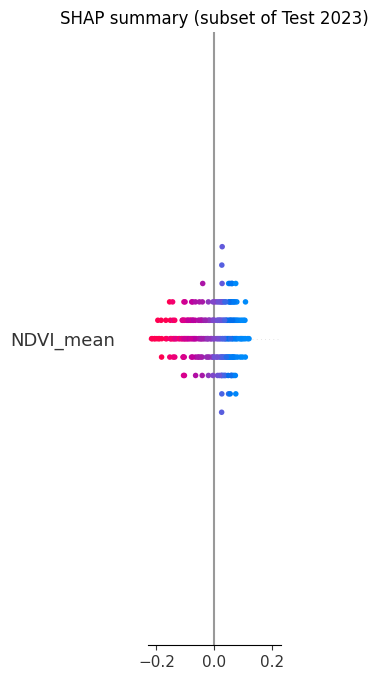

In [47]:
import shap
import torch
import torch.nn as nn

class WrappedModel(nn.Module):
    def __init__(self, base_model):
        super().__init__()
        self.base_model = base_model

    def forward(self, x):
        # base_model returns (B,) -> make it (B, 1)
        return self.base_model(x).unsqueeze(1)

wrapped_model = WrappedModel(best_model).to(device)
wrapped_model.eval()

# Background and explain tensors must be on the same device
bg_idx = np.random.choice(X_train.shape[0], size=min(256, X_train.shape[0]), replace=False)
ex_idx = np.random.choice(X_test.shape[0],  size=min(256, X_test.shape[0]),  replace=False)

X_bg = torch.tensor(X_train[bg_idx], dtype=torch.float32).unsqueeze(1).to(device)
X_ex = torch.tensor(X_test[ex_idx],  dtype=torch.float32).unsqueeze(1).to(device)

explainer = shap.GradientExplainer(wrapped_model, X_bg)
shap_vals = explainer.shap_values(X_ex)

# shap_vals is often a list (one element for one output)
sv = shap_vals[0] if isinstance(shap_vals, list) else shap_vals

# sv will be (N, 1, num_features) -> squeeze channel dim
sv = sv[:, 0, :]

shap.summary_plot(sv, features=X_test[ex_idx], feature_names=feature_cols, show=False)
plt.title("SHAP summary (subset of Test 2023)")
plt.show()


/tmp/ipython-input-1103258092.py:23: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(sv, features=X_test[ex_idx], feature_names=feature_cols, show=False)
/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


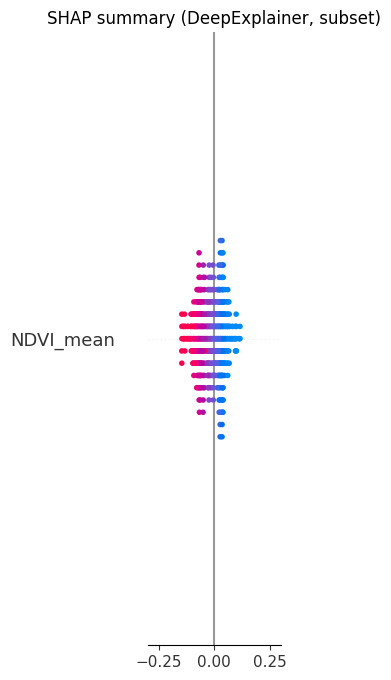

In [48]:
# Install if needed:
# !pip -q install shap

import shap

# Background samples (small subset from train)
bg_idx = np.random.choice(X_train.shape[0], size=min(512, X_train.shape[0]), replace=False)
X_bg = torch.tensor(X_train[bg_idx], dtype=torch.float32).unsqueeze(1).to(device)

# Explain samples (small subset from test)
ex_idx = np.random.choice(X_test.shape[0], size=min(512, X_test.shape[0]), replace=False)
X_ex = torch.tensor(X_test[ex_idx], dtype=torch.float32).unsqueeze(1).to(device)

best_model.eval()

explainer = shap.DeepExplainer(wrapped_model, X_bg)
shap_vals = explainer.shap_values(X_ex)

# Convert to (N, num_features)
sv = shap_vals[0] if isinstance(shap_vals, list) else shap_vals
sv = sv[:, 0, :]

shap.summary_plot(sv, features=X_test[ex_idx], feature_names=feature_cols, show=False)
plt.title("SHAP summary (DeepExplainer, subset)")
plt.show()


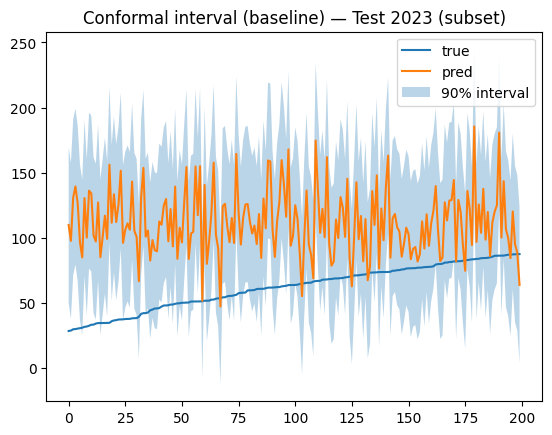

In [49]:
# Train a median quantile model (q=0.5) using the best architecture params but quantile loss
best_arch = {
    "channels": best["params"]["channels"],
    "kernel_size": best["params"]["kernel_size"],
    "dropout": best["params"]["dropout"],
    "fc_units": best["params"]["fc_units"]
}

cfg = TrainConfig(
    batch_size=best["params"]["batch_size"],
    lr=best["params"]["lr"],
    weight_decay=best["params"]["weight_decay"],
    epochs=200
)

q_model, q_hist, _ = train_one_run(
    X_train, y_train, X_val, y_val,
    model_params=best_arch,
    cfg=cfg,
    loss_name="quantile",
    quantile=0.5
)

# Predict on VAL to get residuals (in yield space)
val_loader = DataLoader(TabularSeqDataset(X_val, y_val), batch_size=512, shuffle=False)
_, _, yvhat_log, yvtrue_log = evaluate_model(q_model, val_loader, get_loss("quantile", 0.5))
yvhat = y_inverse(yvhat_log)
yvtrue = y_inverse(yvtrue_log)
val_abs_resid = np.abs(yvtrue - yvhat)

# Conformal interval radius for 90% coverage
alpha = 0.10
q = np.quantile(val_abs_resid, 1 - alpha)

# Apply to TEST predictions
test_pred = predict_yield_space(q_model, X_test)
lower = test_pred - q
upper = test_pred + q

# Quick plot for a slice
plt.figure()
idx = np.argsort(ytrue)[:200]  # 200 lowest-yield samples (just for a clean plot)
plt.plot(ytrue[idx], label="true")
plt.plot(test_pred[idx], label="pred")
plt.fill_between(np.arange(len(idx)), lower[idx], upper[idx], alpha=0.3, label="90% interval")
plt.legend()
plt.title("Conformal interval (baseline) — Test 2023 (subset)")
plt.show()


In [50]:
best_params = best["params"]   # from your tuner result

best_arch = {
    "channels": best_params["channels"],
    "kernel_size": best_params["kernel_size"],
    "dropout": best_params["dropout"],
    "fc_units": best_params["fc_units"]
}

best_cfg = TrainConfig(
    batch_size=best_params["batch_size"],
    lr=best_params["lr"],
    weight_decay=best_params["weight_decay"],
    epochs=200,                 # or keep as you used in tuning
    patience=20,
    plateau_patience=8,
    lr_factor=0.5,
    min_lr=1e-6,
    jump_patience=18,
    jump_multiplier=0.9
)

best_loss_name = best_params["loss_name"]


In [52]:
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from torch.utils.data import DataLoader

VAL_YEARS_FIXED = {2014, 2023, 2024}

def run_fixed_val_loyo(df, years=None):
    if years is None:
        years = sorted(df["year"].unique())

    results = []

    for test_year in years:
        # Keep validation years "the same", except remove test_year if it overlaps
        val_years = set(VAL_YEARS_FIXED)
        if test_year in val_years:
            val_years = val_years - {test_year}

        # Define splits
        test_df = df[df["year"] == test_year].copy()
        val_df  = df[df["year"].isin(val_years)].copy()
        train_df = df[~df["year"].isin(val_years.union({test_year}))].copy()

        # Sanity (no leakage)
        assert set(train_df["year"]).isdisjoint(val_years)
        assert test_year not in set(train_df["year"])
        assert test_year not in set(val_df["year"])

        # Fit scaler on TRAIN only
        scaler = StandardScaler()
        X_train = scaler.fit_transform(train_df[feature_cols].values.astype(np.float32))
        X_val   = scaler.transform(val_df[feature_cols].values.astype(np.float32))
        X_test  = scaler.transform(test_df[feature_cols].values.astype(np.float32))

        # Log-transform target
        y_train = y_transform(train_df[TARGET_COL].values.astype(np.float32))
        y_val   = y_transform(val_df[TARGET_COL].values.astype(np.float32))
        y_test  = y_transform(test_df[TARGET_COL].values.astype(np.float32))

        # Train with the same best hyperparameters
        model, hist, best_val_loss = train_one_run(
            X_train, y_train, X_val, y_val,
            model_params=best_arch,
            cfg=best_cfg,
            loss_name=best_loss_name
        )

        # Test on held-out year
        test_loader = DataLoader(TabularSeqDataset(X_test, y_test), batch_size=512, shuffle=False)
        loss_fn = get_loss(best_loss_name)
        test_loss_log, test_metrics_log, yhat_log, ytrue_log = evaluate_model(model, test_loader, loss_fn)

        # Convert to yield space
        yhat = y_inverse(yhat_log)
        ytrue = y_inverse(ytrue_log)

        rmse = math.sqrt(mean_squared_error(ytrue, yhat))
        mae  = mean_absolute_error(ytrue, yhat)
        r2   = r2_score(ytrue, yhat)
        corr_sq = np.corrcoef(ytrue, yhat)[0, 1] ** 2

        results.append({
            "test_year": int(test_year),
            "val_years_used": sorted(list(val_years)),
            "n_train": int(len(train_df)),
            "n_val": int(len(val_df)),
            "n_test": int(len(test_df)),
            "test_loss_log": float(test_loss_log),
            "rmse_log": float(test_metrics_log["rmse_log"]),
            "mae_log": float(test_metrics_log["mae_log"]),
            "r2_log": float(test_metrics_log["r2_log"]),
            "rmse": float(rmse),
            "mae": float(mae),
            "r2": float(r2),
            "corr_sq": float(corr_sq)
        })

        print(f"Done test_year={test_year} | val_years={sorted(val_years)} | RMSE={rmse:.3f} | R2={r2:.3f} | Corr_sq={corr_sq}")

    return pd.DataFrame(results).sort_values("test_year")

luyo_df = run_fixed_val_loyo(df)
luyo_df


Done test_year=2014 | val_years=[2023, 2024] | RMSE=33.009 | R2=-0.340 | Corr_sq=0.1448635301903994
Done test_year=2015 | val_years=[2014, 2023, 2024] | RMSE=38.952 | R2=0.152 | Corr_sq=0.2963000825848608
Done test_year=2016 | val_years=[2014, 2023, 2024] | RMSE=39.671 | R2=0.045 | Corr_sq=0.18841927446058418
Done test_year=2017 | val_years=[2014, 2023, 2024] | RMSE=39.108 | R2=0.134 | Corr_sq=0.2397353756066902
Done test_year=2018 | val_years=[2014, 2023, 2024] | RMSE=45.850 | R2=-1.146 | Corr_sq=0.140075655452924
Done test_year=2019 | val_years=[2014, 2023, 2024] | RMSE=44.991 | R2=-0.382 | Corr_sq=0.15818387520643082
Done test_year=2020 | val_years=[2014, 2023, 2024] | RMSE=38.111 | R2=0.273 | Corr_sq=0.28606762110060907
Done test_year=2021 | val_years=[2014, 2023, 2024] | RMSE=38.291 | R2=0.225 | Corr_sq=0.26999941268329986
Done test_year=2022 | val_years=[2014, 2023, 2024] | RMSE=41.991 | R2=0.083 | Corr_sq=0.25193531551861087
Done test_year=2023 | val_years=[2014, 2024] | RMSE=54

test_year      val_years_used  n_train  n_val  n_test  test_loss_log  \
0        2014        [2023, 2024]     9585   1584     654       0.042283   
1        2015  [2014, 2023, 2024]     8720   2238     865       0.077605   
2        2016  [2014, 2023, 2024]     7938   2238    1647       0.056635   
3        2017  [2014, 2023, 2024]     8577   2238    1008       0.070605   
4        2018  [2014, 2023, 2024]     9140   2238     445       0.123857   
5        2019  [2014, 2023, 2024]     8142   2238    1443       0.098838   
6        2020  [2014, 2023, 2024]     8325   2238    1260       0.058635   
7        2021  [2014, 2023, 2024]     7510   2238    2075       0.044273   
8        2022  [2014, 2023, 2024]     8743   2238     842       0.057413   
9        2023        [2014, 2024]     9585   1246     992       0.099633   
10       2024        [2014, 2023]     9585   1646     592       0.070790   

    rmse_log   mae_log    r2_log       rmse        mae        r2   corr_sq  
0   0.298328  0.218099 -0.315418  33.008618  26.209133 -0.339995  0.144864  
1   0.389578  0.277827  0.037360  38.951942  30.394262  0.152046  0.296300  
2   0.325234  0.228333  0.054588  39.671137  30.647078  0.044676  0.188419  
3   0.376776  0.266250  0.150298  39.108261  30.549192  0.133517  0.239735  
4   0.501470  0.379301 -0.759125  45.849871  36.751839 -1.145713  0.140076  
5   0.442987  0.349456 -0.278770  44.990859  37.465511 -0.381744  0.158184  
6   0.365119  0.267953  0.216836  38.110674  30.759920  0.273201  0.286068  
7   0.316730  0.225236  0.189871  38.291391  29.843771  0.225462  0.269999  
8   0.335911  0.258691  0.148199  41.990884  34.622799  0.083041  0.251935  
9   0.447206  0.366284 -0.556619  54.690118  43.964600 -0.572433  0.135853  
10  0.461743  0.346702 -0.518638  35.432136  28.352625 -0.540789  0.018572